# **Rayan International AI Contest**

<font color='black' style='font-family: "Times New Roman", Times, serif; font-size: 24px;'><strong>Machine Learning & Deep Learning Course </strong></font>

<font color='black' style='font-family: "Times New Roman", Times, serif; font-size: 20px;'><em>**Homework 1** || **Title**: Introduction to Machine Learning</em></font>


# Credit Card Fraud Detection

This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.



## Importing Libraries


In [ ]:
!pip install scikit-plot

In [72]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import scikitplot as skplt
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.cluster import KMeans
import cv2
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer, LabelEncoder
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
import time
from sklearn.model_selection import KFold, cross_val_score

## Load Dataset

In [2]:
# Dataset Link: https://www.kaggle.com/datasets/mojtabanafez/rayan-homework1/data
!kaggle datasets download -d mojtabanafez/rayan-homework1

'kaggle' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
!unzip ./rayan-homework1.zip

'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [92]:
df = pd.read_csv("./creditcard.csv")
col_names = df.columns.to_list()
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [93]:
# Separate features and target variable
X = df.drop('Class', axis=1)
y = df['Class']
X.shape, y.shape, y.value_counts()

((284807, 30),
 (284807,),
 Class
 0    284315
 1       492
 Name: count, dtype: int64)

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [95]:
import warnings
warnings.filterwarnings('ignore')

## Exploratory Data Analysis (EDA)



**Student Task:**
1. Check Summary Statistics for the Dataset
2. Visualize Distribution of Classes
3. Check Correlation Matrix
4. Plot the Distribution of Some Selected Features
5. Additional Analysis (Choose at Least 5)
    * Example: Data Visualization (After Dimension Reduction), Outlier Detection, Feature Engineering, Insightful Plots, ...

The describe() function applies basic statistical computations on the dataset like extreme values, count of data points standard deviation, etc. Any missing value or NaN value is automatically skipped. describe() function gives a good picture of the distribution of data. We can also get the description of categorical columns of the dataset if we specify include ='all' in the describe function. We can see the columns and their data types. For this, we will use the info() method.

In [96]:
# ### 2.1 Summary Statistics
# Display summary statistics for the dataset
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [98]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

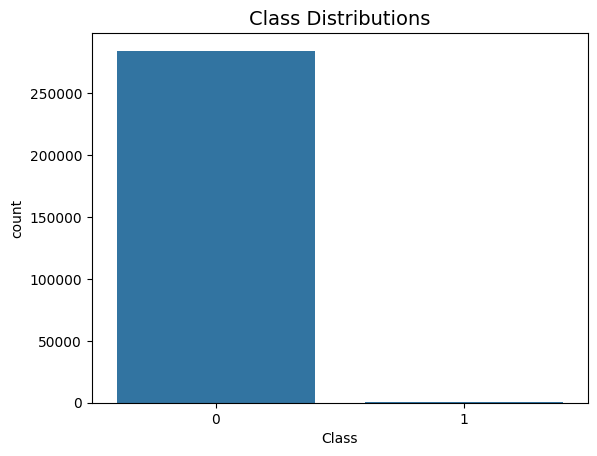

In [54]:
# ### 2.2 Class Distribution
# Visualize the class distribution
sns.countplot(data=df, x="Class")
plt.title("Class Distributions", fontsize=14)
plt.show()

In [99]:
# Display the class distribution in percentages
print("Class Distribution")
print(pd.Series((y.value_counts() / len(df)) * 100, name="proportion"))

Class Distribution
Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64


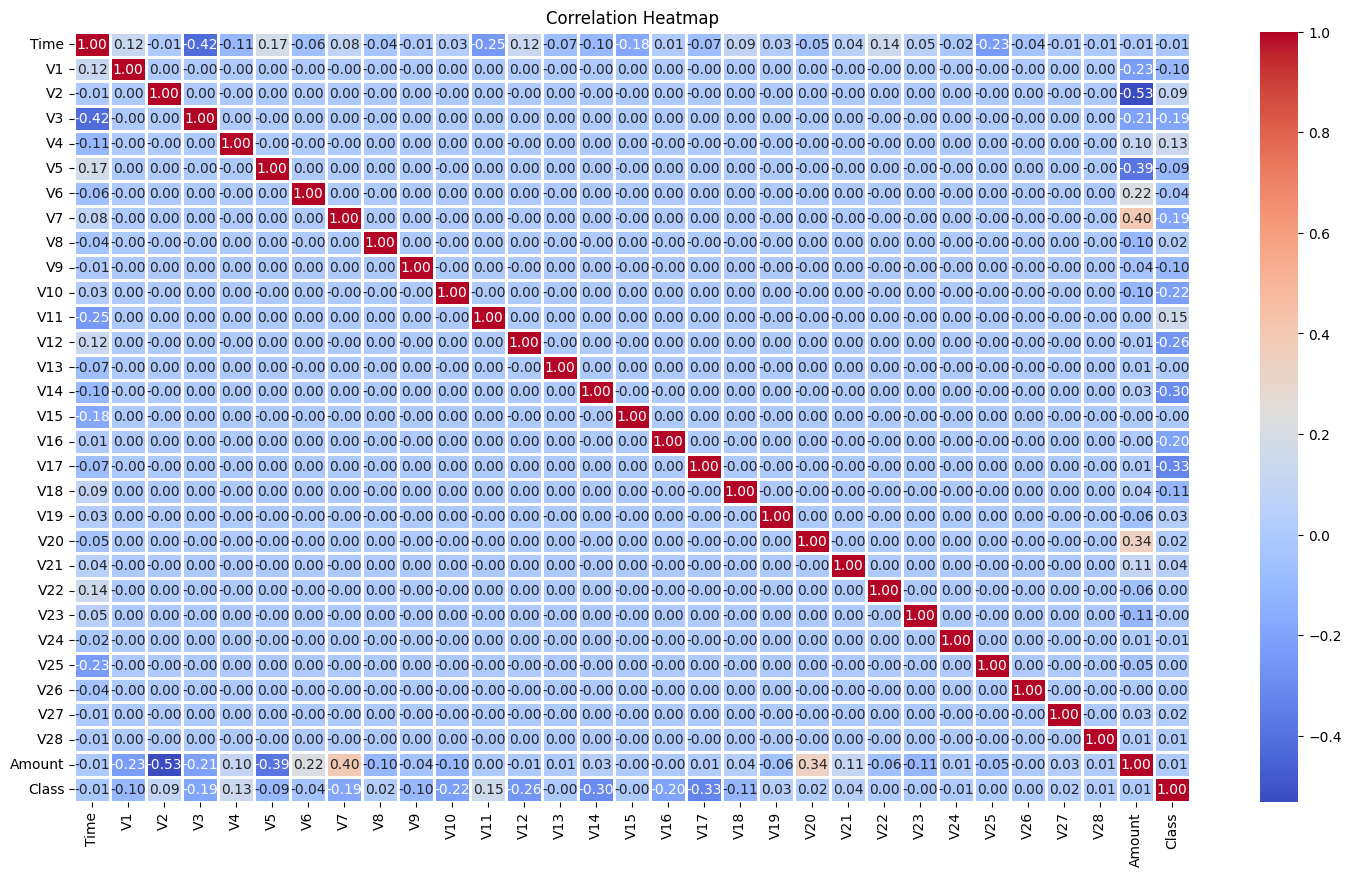

Correlation with target column (Class):
Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
V26       0.004455
V25       0.003308
V22       0.000805
V23      -0.002685
V15      -0.004223
V13      -0.004570
V24      -0.007221
Time     -0.012323
V6       -0.043643
V5       -0.094974
V9       -0.097733
V1       -0.101347
V18      -0.111485
V7       -0.187257
V3       -0.192961
V16      -0.196539
V10      -0.216883
V12      -0.260593
V14      -0.302544
V17      -0.326481
Name: Class, dtype: float64


In [60]:
# ### 2.3 Correlation Matrix
# Compute the correlation matrix
plt.figure(figsize=(18, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.75)
plt.title('Correlation Heatmap')
plt.show()

print("Correlation with target column (Class):")
print(df.corr()['Class'].sort_values(ascending=False))

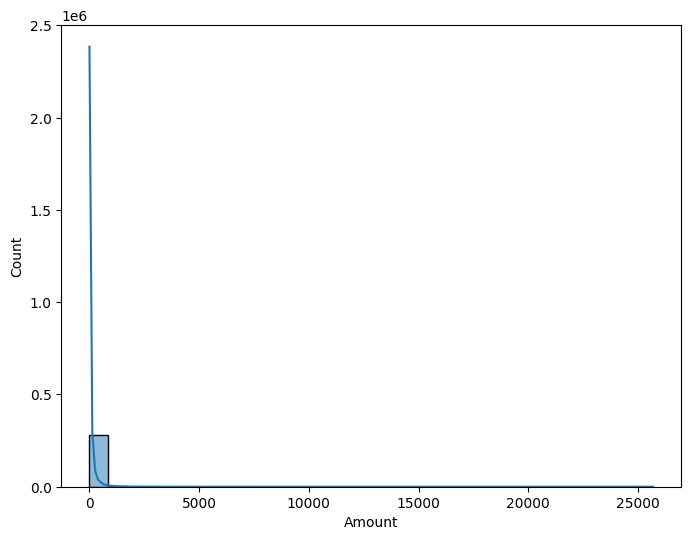

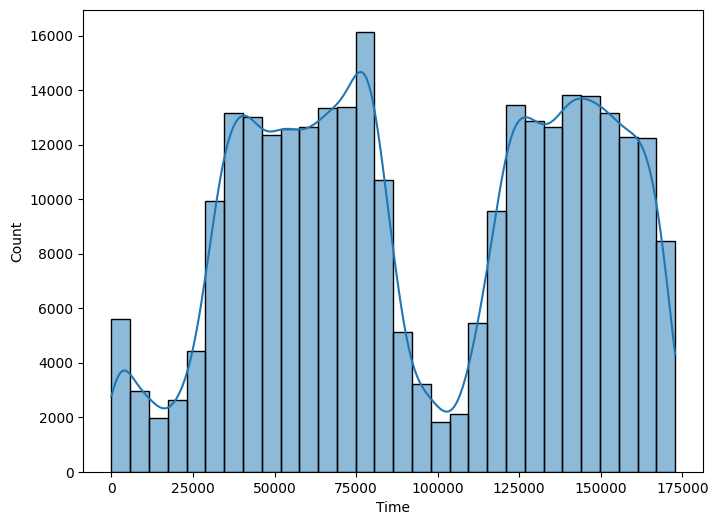

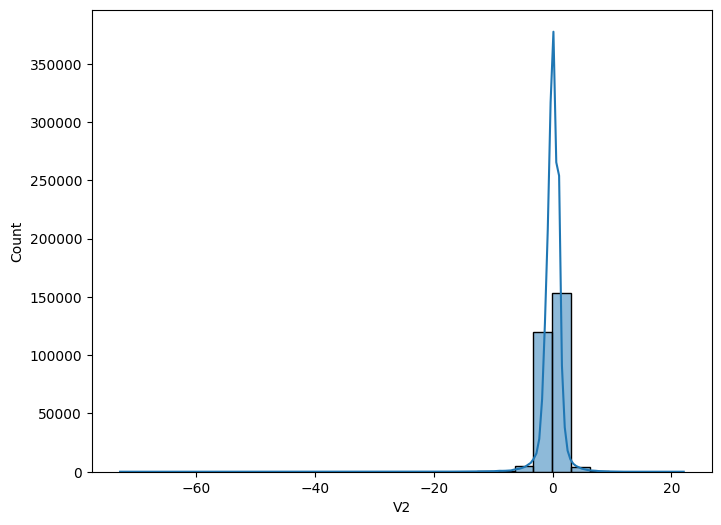

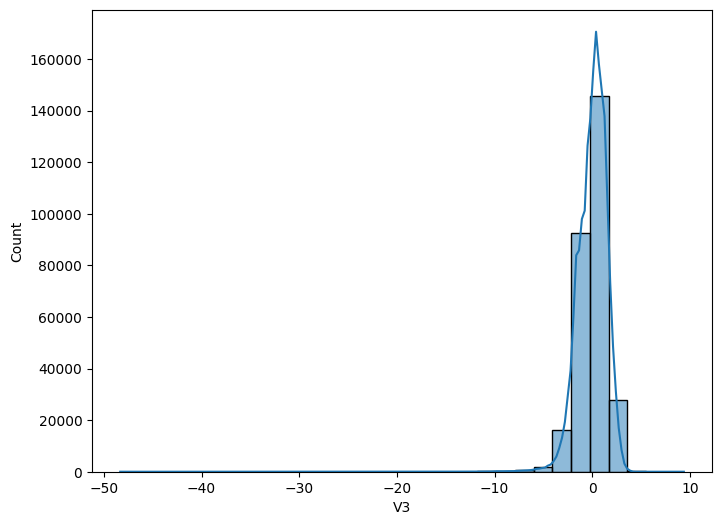

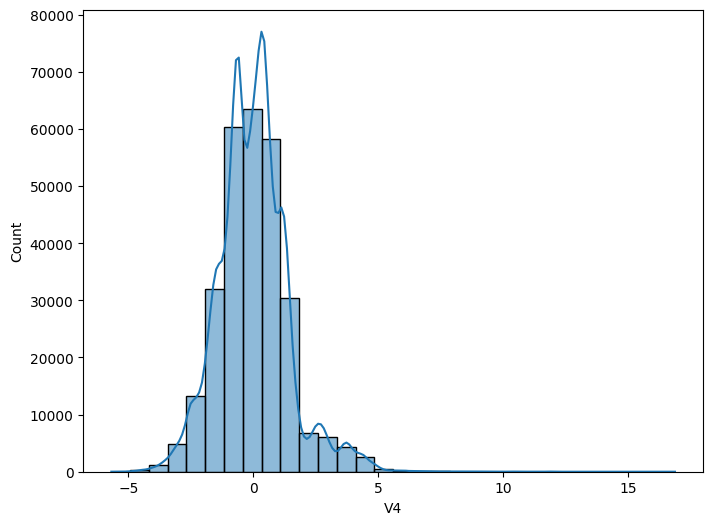

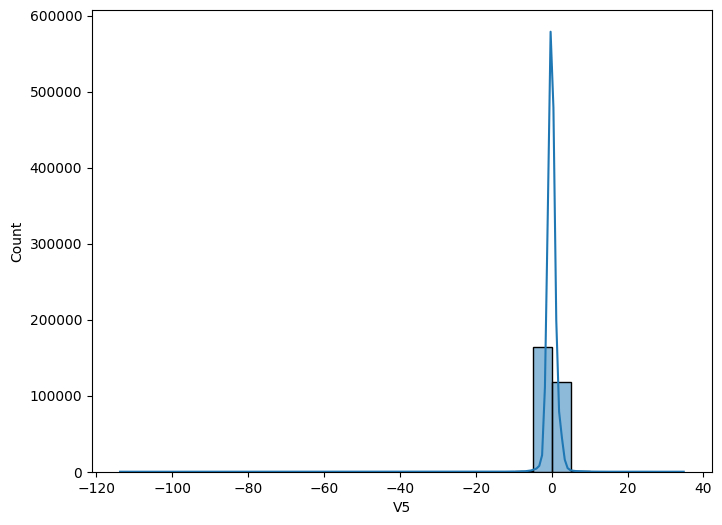

In [62]:
# ### 2.4 Feature Distributions
# Plot the distribution of a few selected features
cols = df[["Amount", "Time", "V2", "V3", "V4", "V5"]]

for col in cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True, bins=30)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

## more creative analysis to learn more..

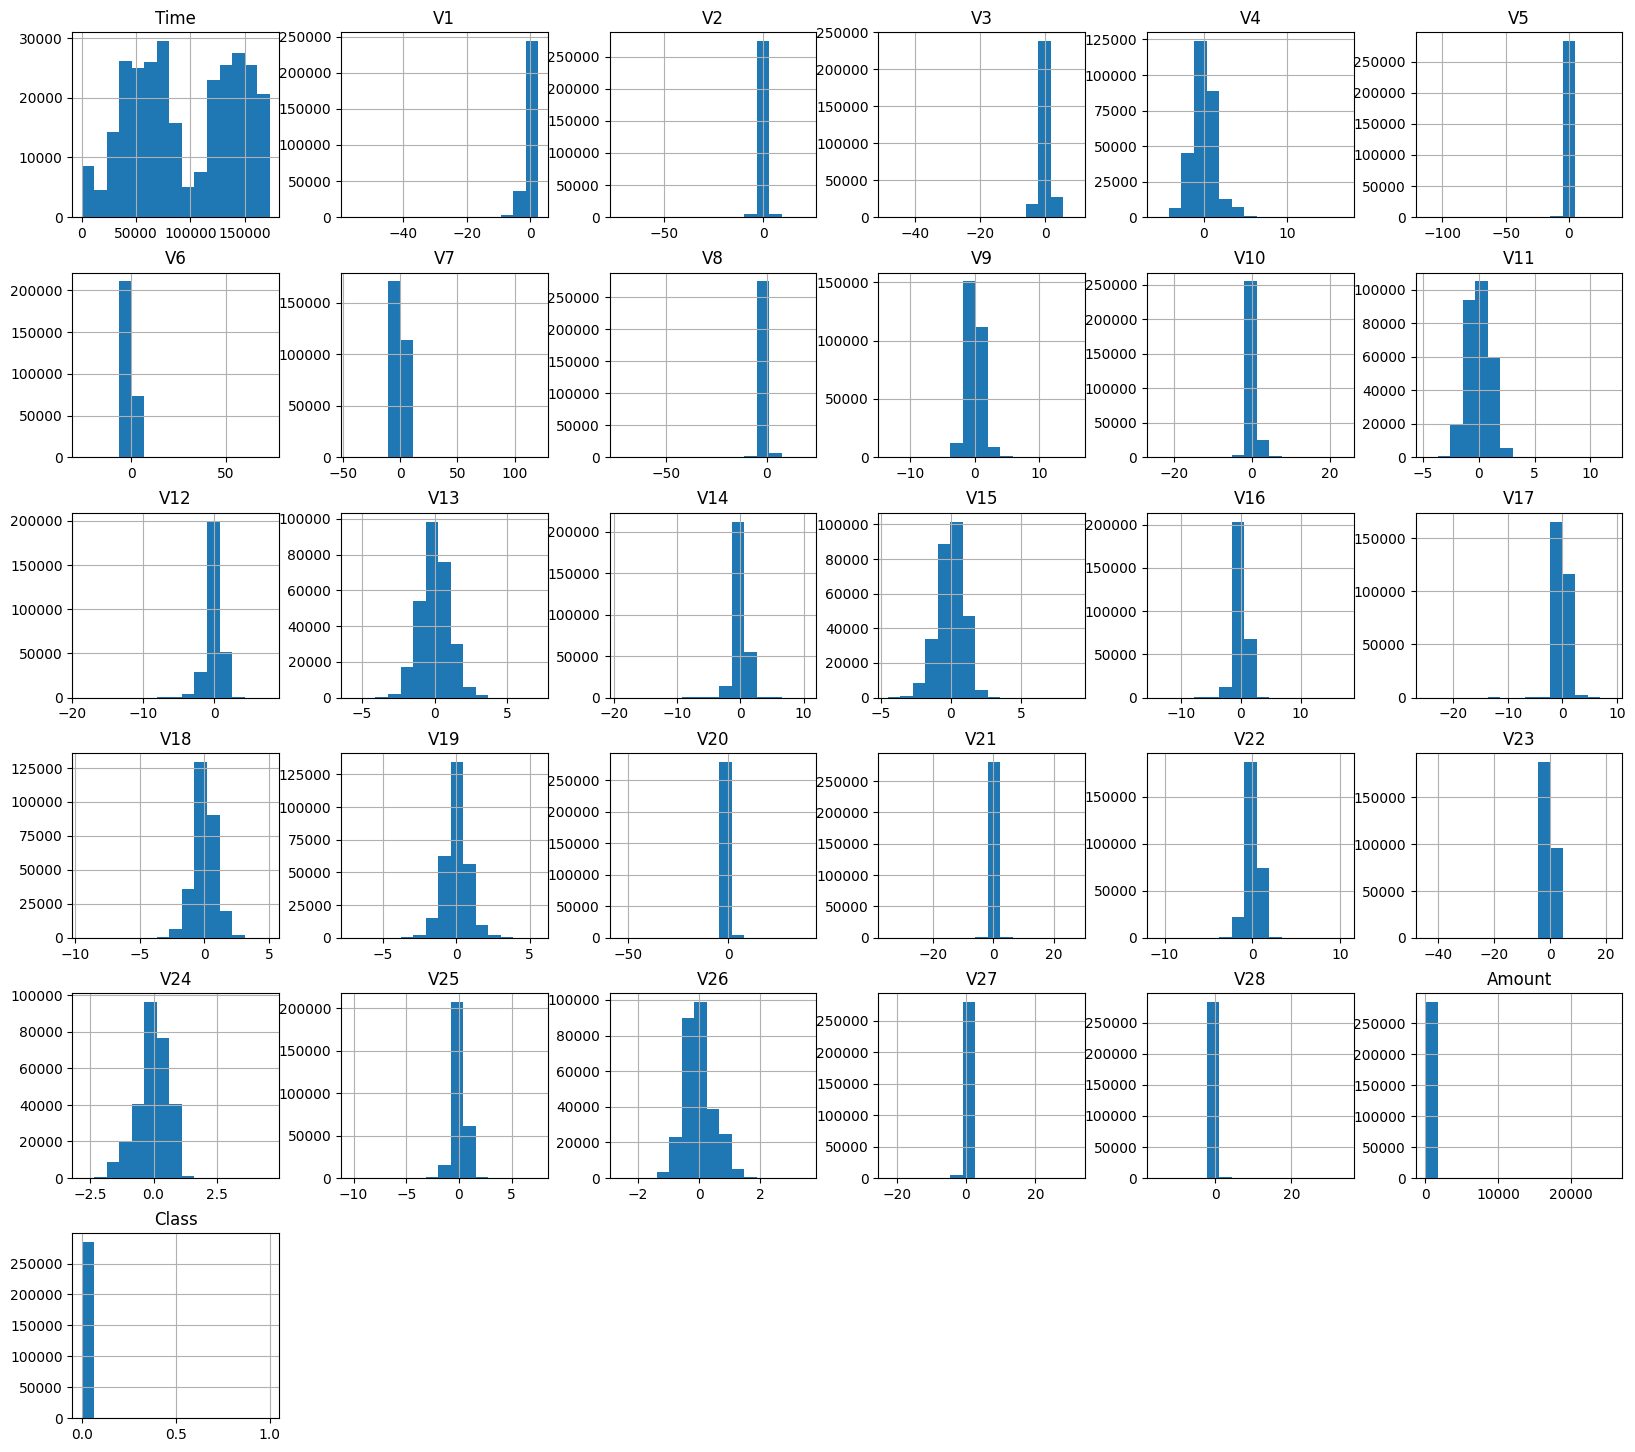

In [59]:
df.hist(bins=15, figsize=(20, 18))
plt.show()

     index  Unique_Values
0     Time         124592
1       V1         275663
2       V2         275663
3       V3         275663
4       V4         275663
5       V5         275663
6       V6         275663
7       V7         275663
8       V8         275663
9       V9         275663
10     V10         275663
11     V11         275663
12     V12         275663
13     V13         275663
14     V14         275663
15     V15         275663
16     V16         275663
17     V17         275663
18     V18         275663
19     V19         275663
20     V20         275663
21     V21         275663
22     V22         275663
23     V23         275663
24     V24         275663
25     V25         275663
26     V26         275663
27     V27         275663
28     V28         275663
29  Amount          32767
30   Class              2


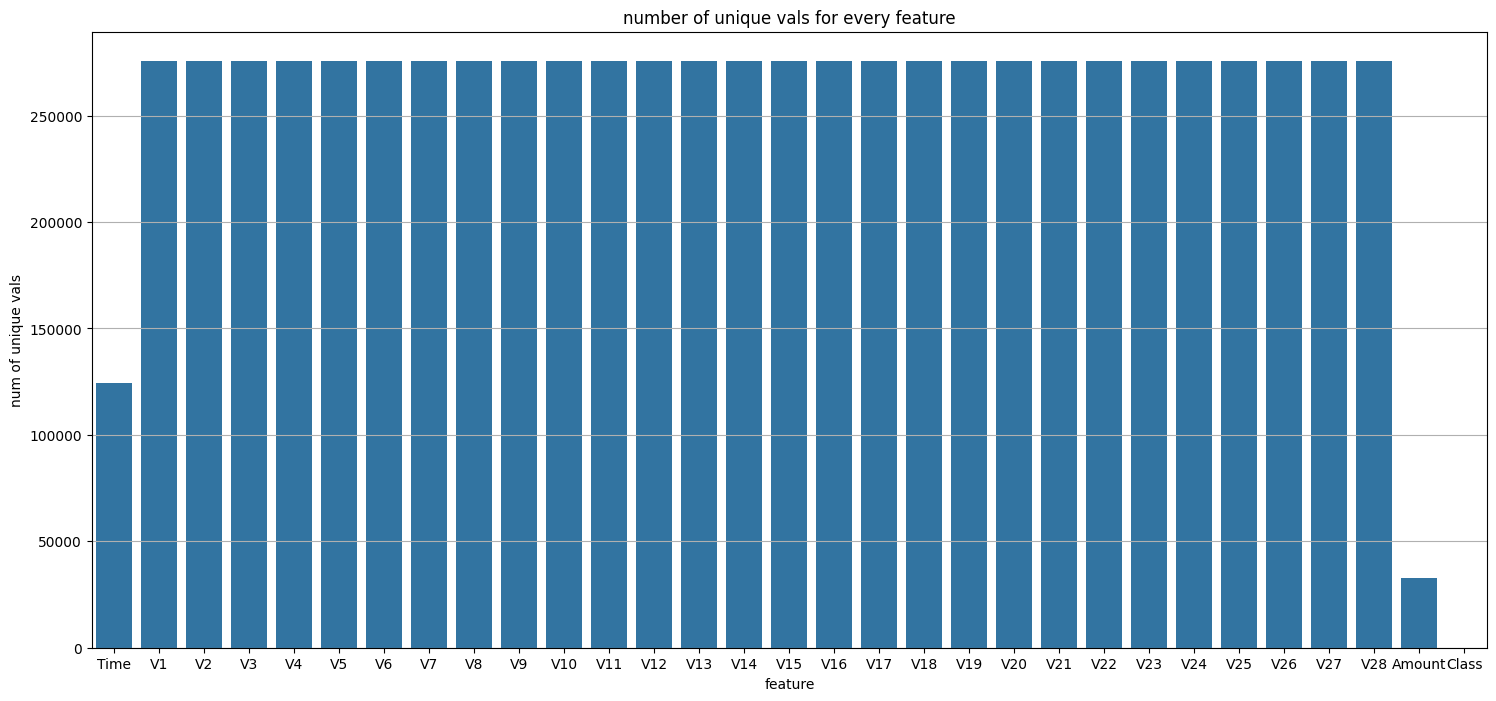

In [26]:
# Graph of the number of unique values for each feature
nu = df.nunique().reset_index(name="Unique_Values")
print(nu)
plt.figure(figsize=(18,8))
plt.title("number of unique vals for every feature")
plt.grid(True)
nu.columns = ['feature','num of unique vals']
ax = sns.barplot(x=nu.columns[0], y=nu.columns[1], data=nu)

### Scatter and hexbin charts

Hexbin plot is a type of 2-dimensional scatter plot that is used to visualize the distribution of data points. Unlike a traditional scatter plot, where each data point is represented as a single dot, a hexbin plot aggregates the data points into a set of hexagonal bins. Each hexagonal bin is color-coded to represent the density of data points within that bin. The color scale is usually represented by a color map that ranges from light to dark, where lighter colors indicate lower densities and darker colors indicate higher densities.

In addition to showing the relationship between two variables, hexbin plots can also be used to visualize the distribution of the data, identify outliers, and detect regions of high and low density. These plots are also useful for exploring the relationship between two variables in a non-parametric way, as they do not make assumptions about the underlying distribution of the data.

The resulting plot shows the distribution of sepal length and width, with each hexagonal bin representing a region in the plot where there is a higher density of data points. The color of each bin is represented by a color map that ranges from light to dark, where lighter colors indicate lower densities and darker colors indicate higher densities.

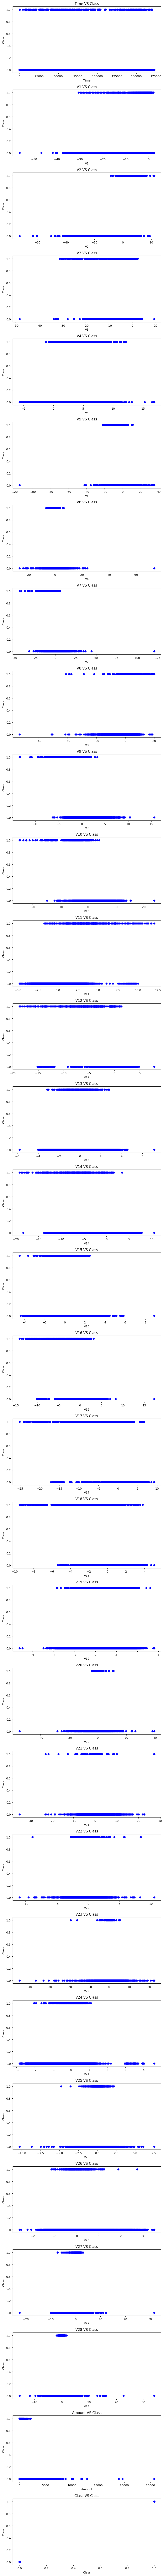

In [181]:
fig, axes = plt.subplots(nrows=len(col_names), ncols=1, figsize=(8, 4*len(col_names)))
for i, col in enumerate(col_names):
    axes[i].scatter(x=df[col] , y=df["Class"] , c="blue")
    axes[i].set_title(col + ' VS Class')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Class")

plt.tight_layout()
plt.show()

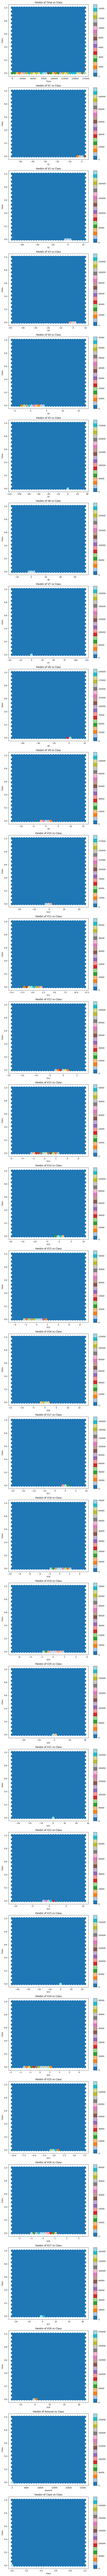

In [182]:
fig, axes = plt.subplots(nrows=len(col_names), ncols=1, figsize=(8, 6*len(col_names)))

for i, col in enumerate(col_names):
    hb = axes[i].hexbin(df[col], df["Class"], gridsize=30, cmap='tab20')
    axes[i].set_title(f"Hexbin of {col} vs Class")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Class")
    fig.colorbar(hb, ax=axes[i])

plt.tight_layout()
plt.show()

### In the below fig, a histogram and box plot is used to show the pattern of the variables (We see the distribution of each column), as some variables have skewness and outliers.

Time
Skew : -0.04


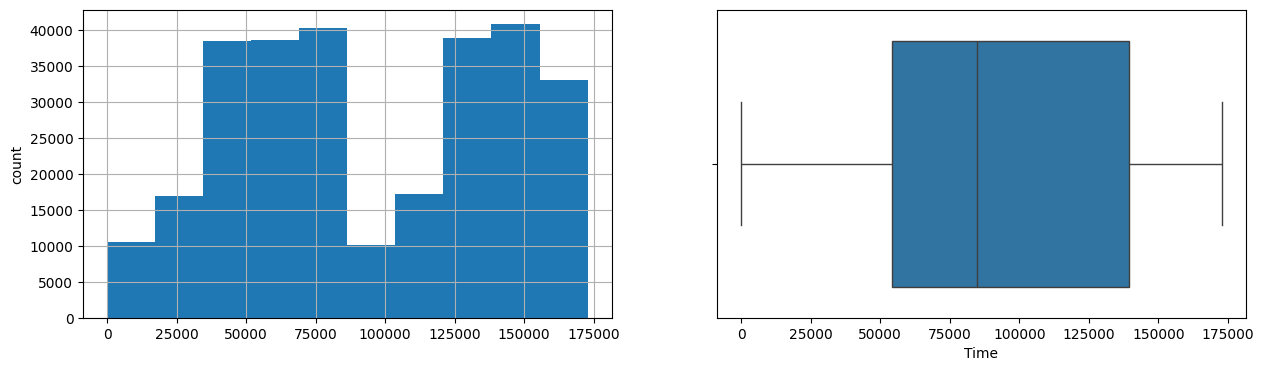

V1
Skew : -3.28


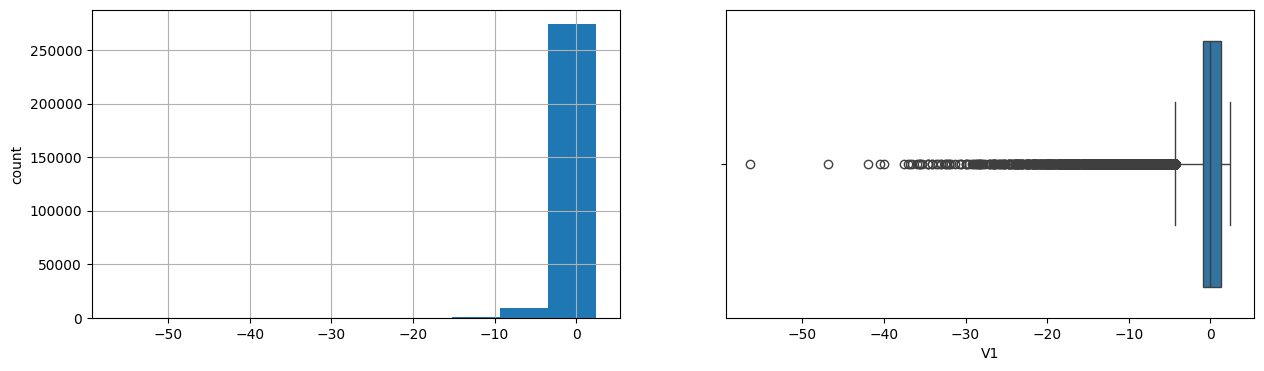

V2
Skew : -4.62


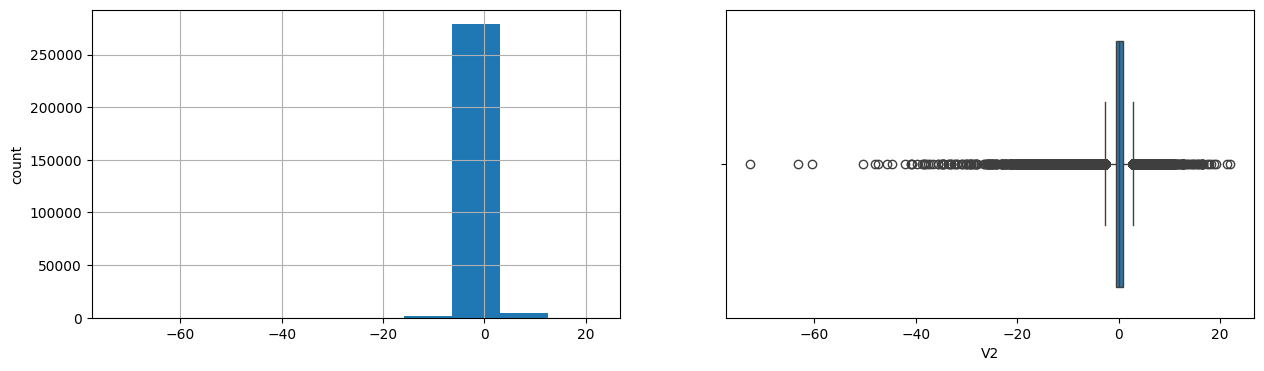

V3
Skew : -2.24


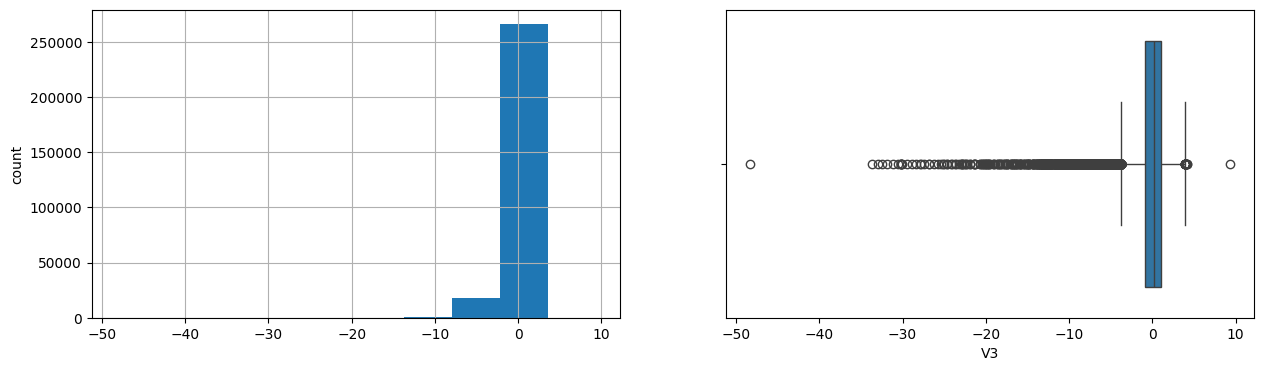

V4
Skew : 0.68


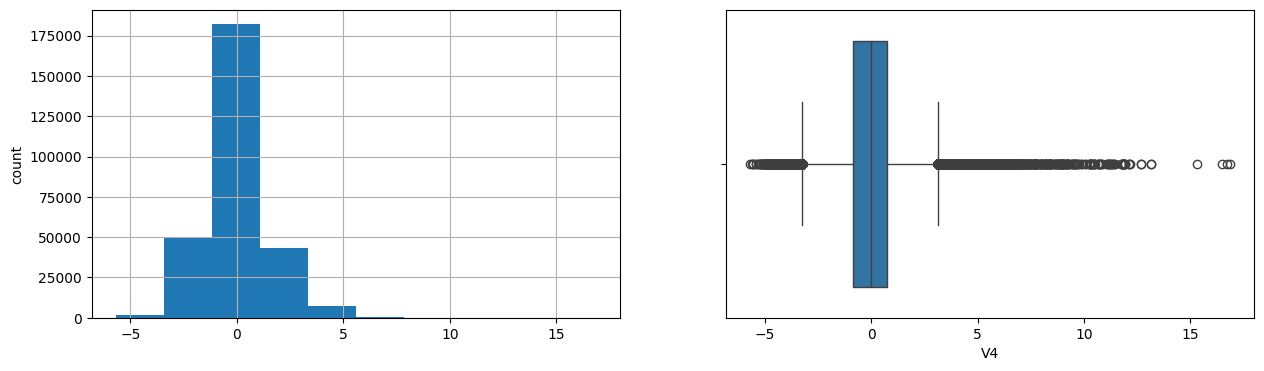

V5
Skew : -2.43


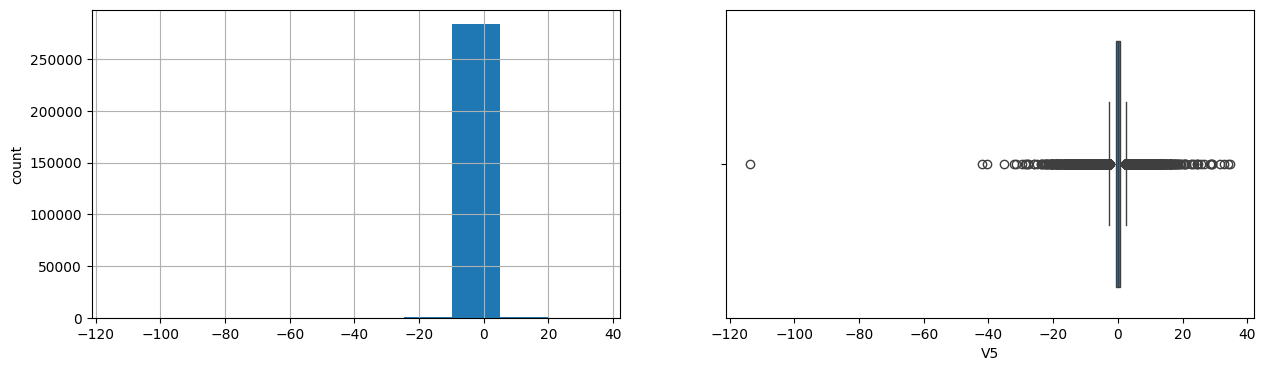

V6
Skew : 1.83


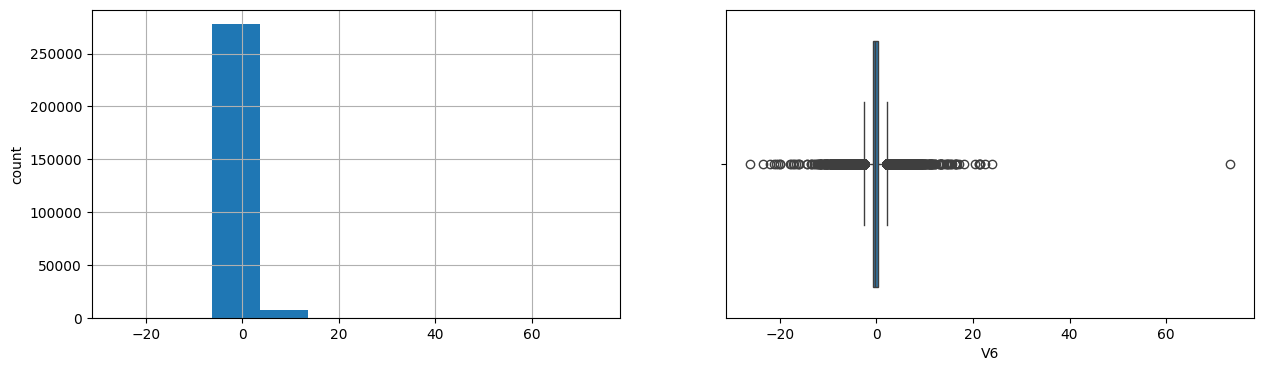

V7
Skew : 2.55


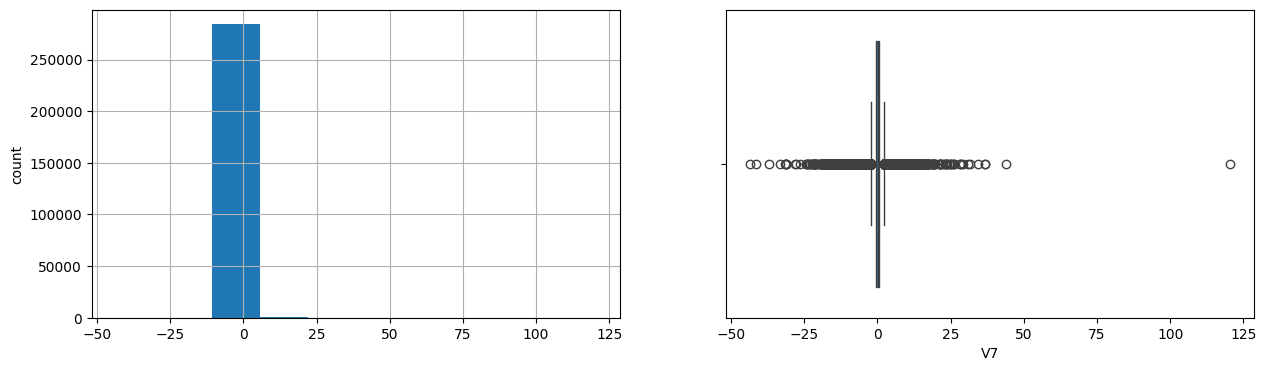

V8
Skew : -8.52


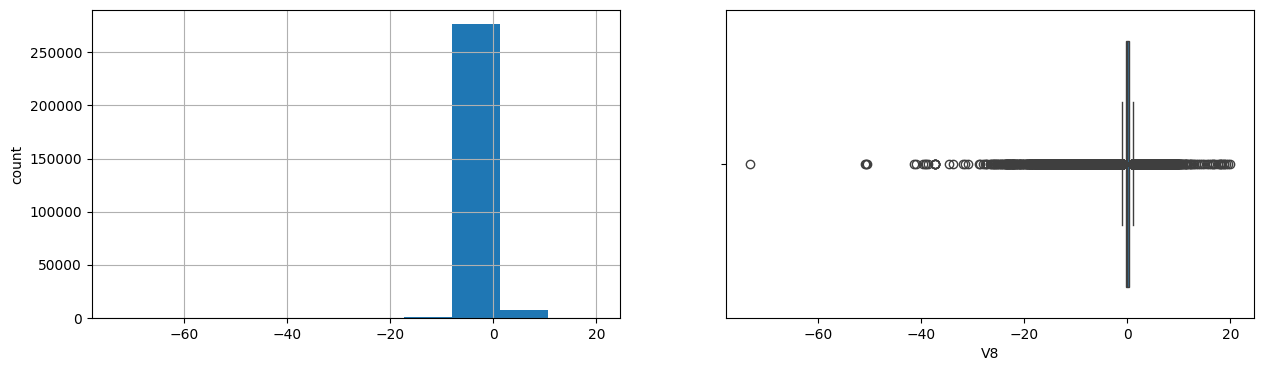

V9
Skew : 0.55


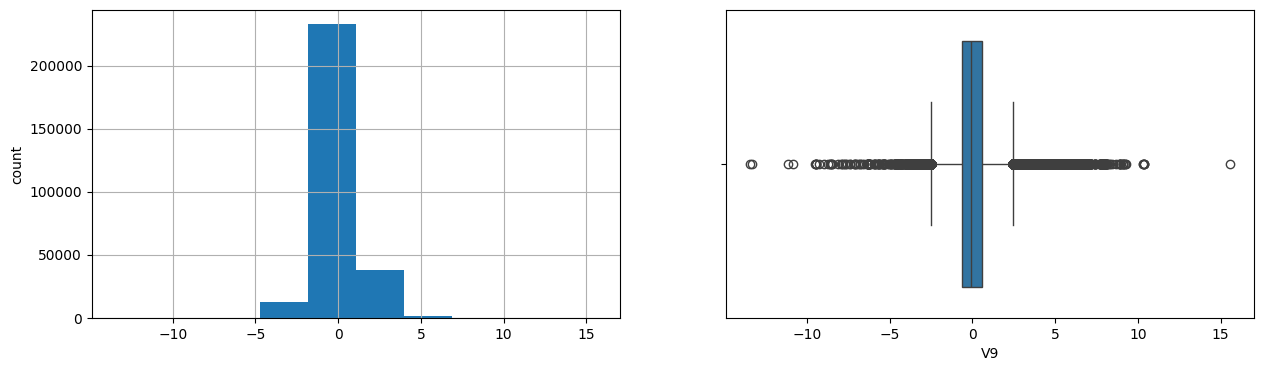

V10
Skew : 1.19


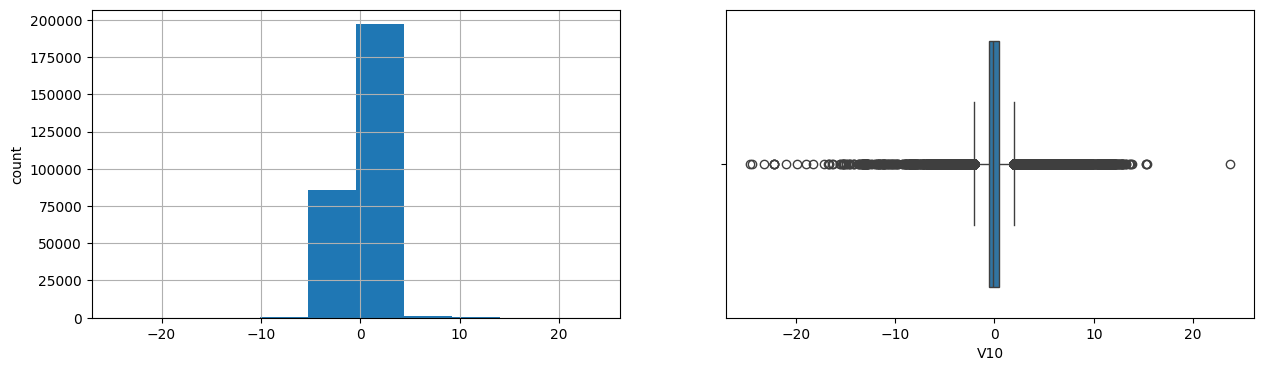

V11
Skew : 0.36


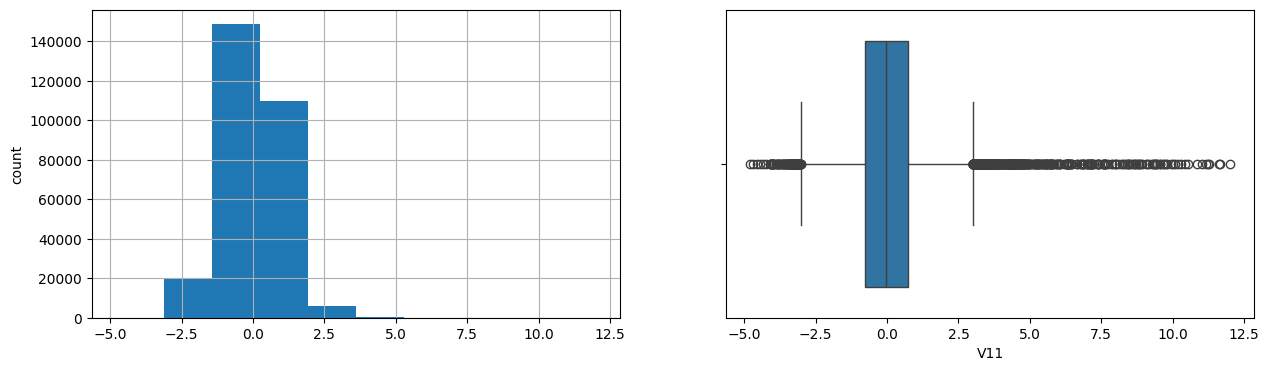

V12
Skew : -2.28


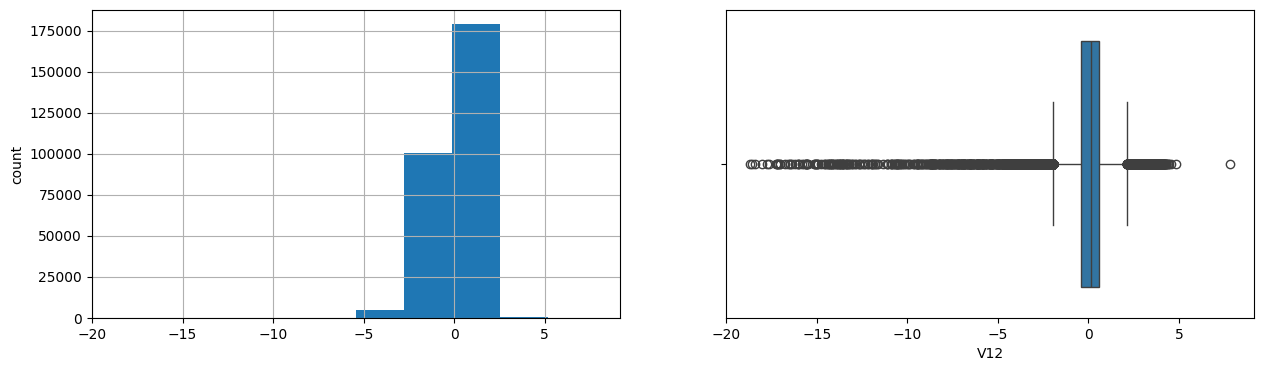

V13
Skew : 0.07


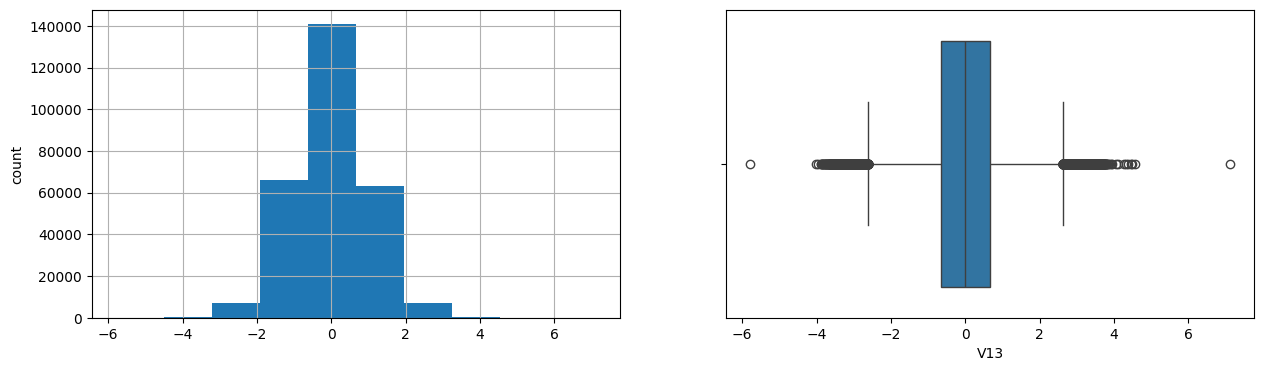

V14
Skew : -2.0


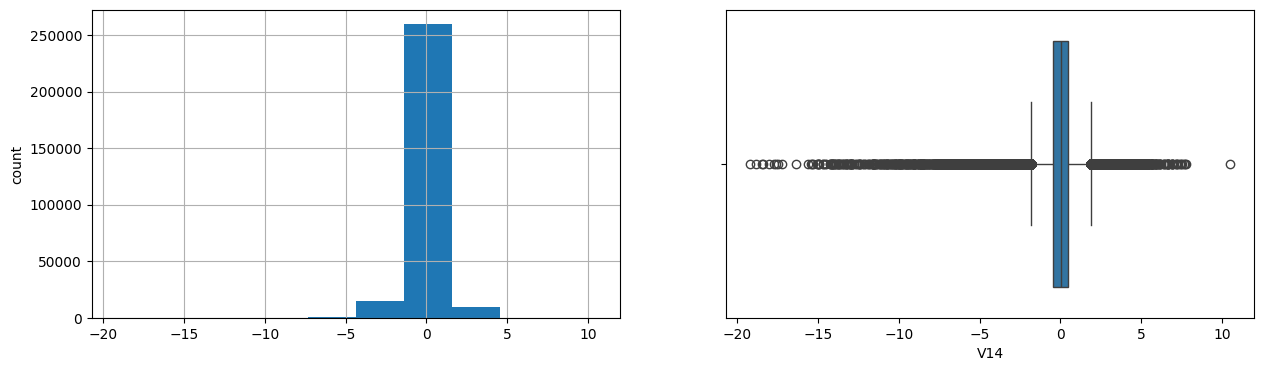

V15
Skew : -0.31


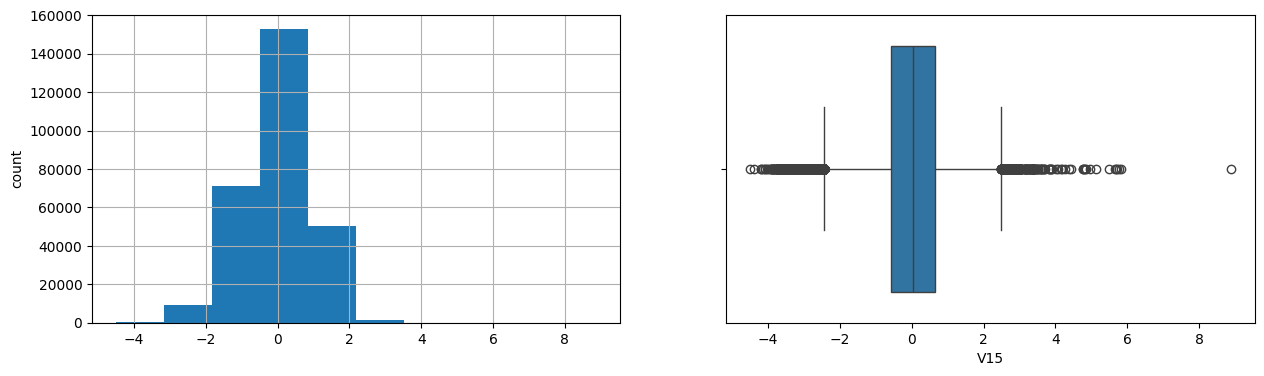

V16
Skew : -1.1


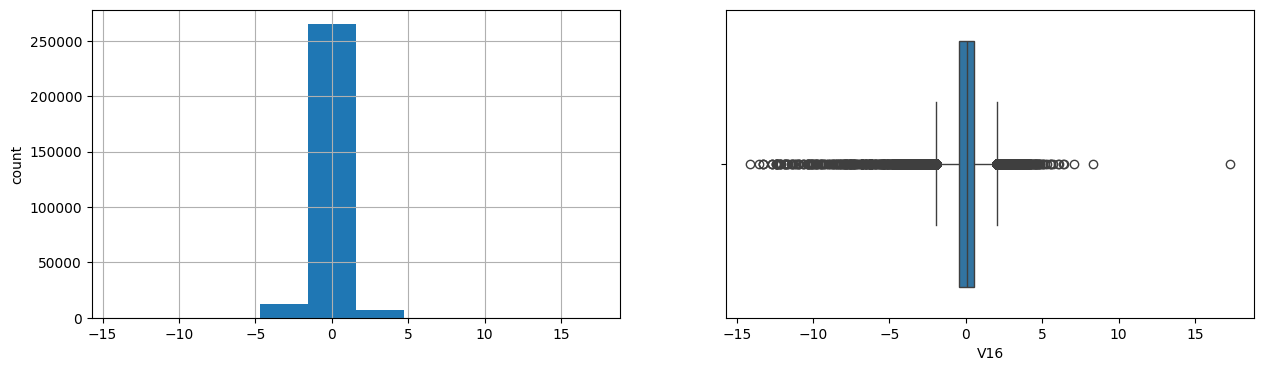

V17
Skew : -3.84


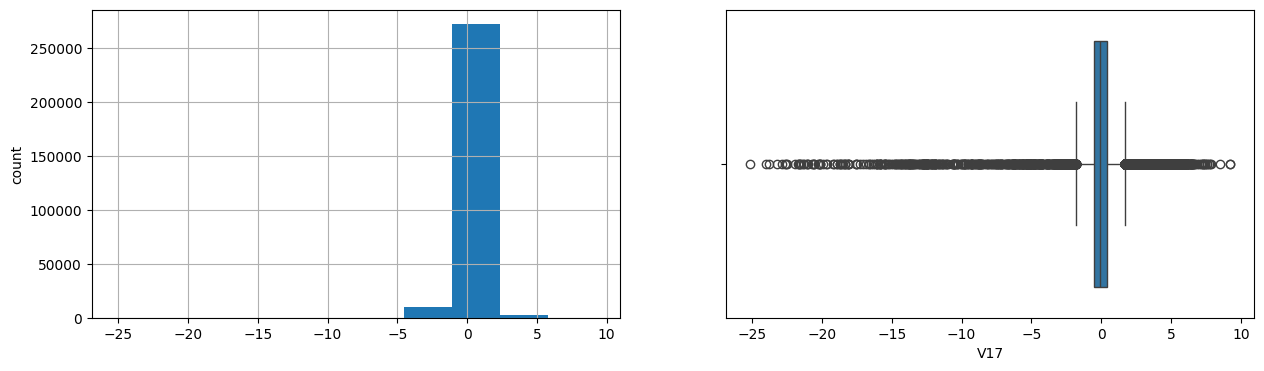

V18
Skew : -0.26


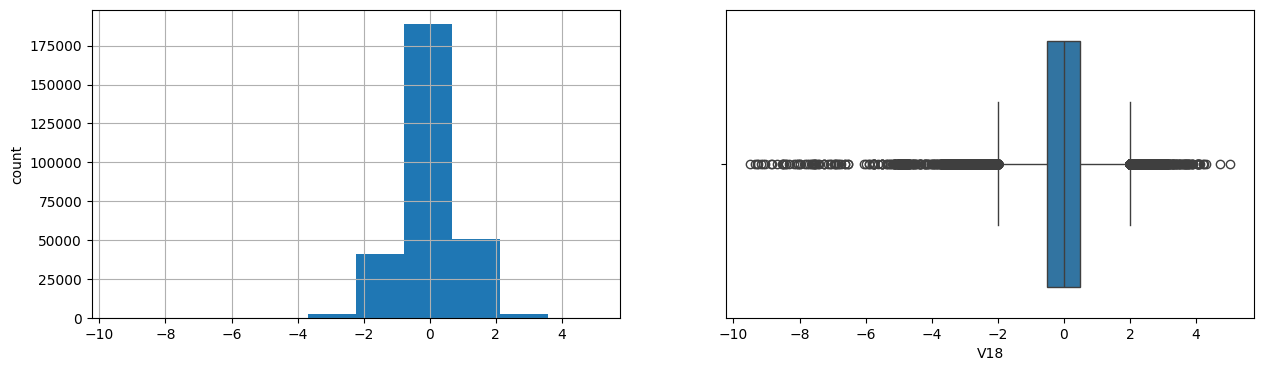

V19
Skew : 0.11


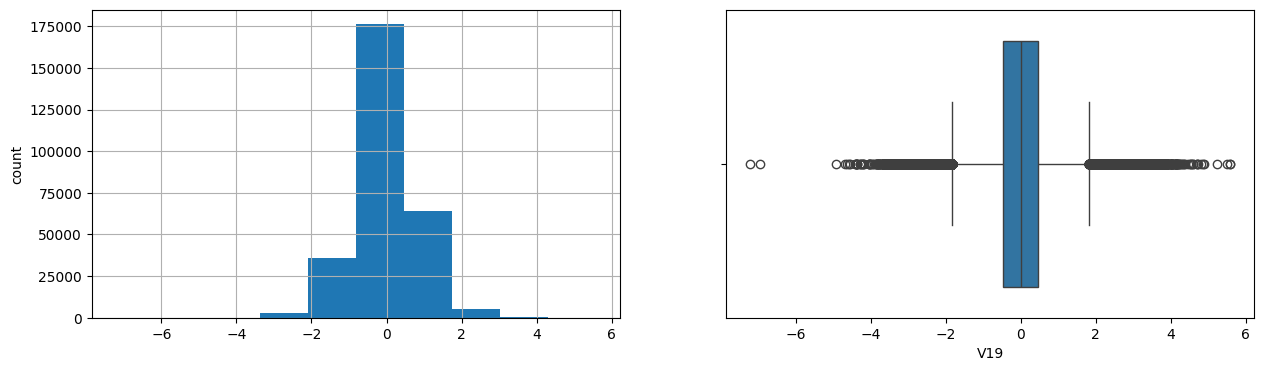

V20
Skew : -2.04


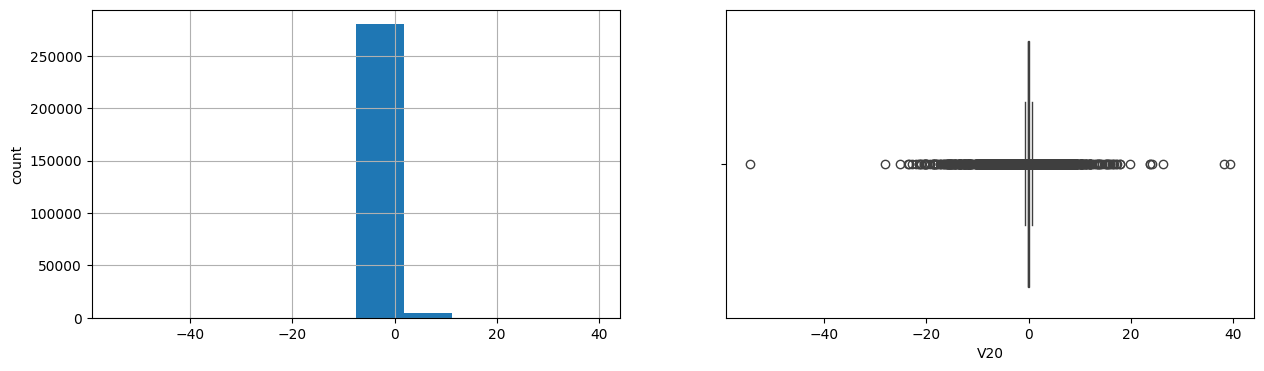

V21
Skew : 3.59


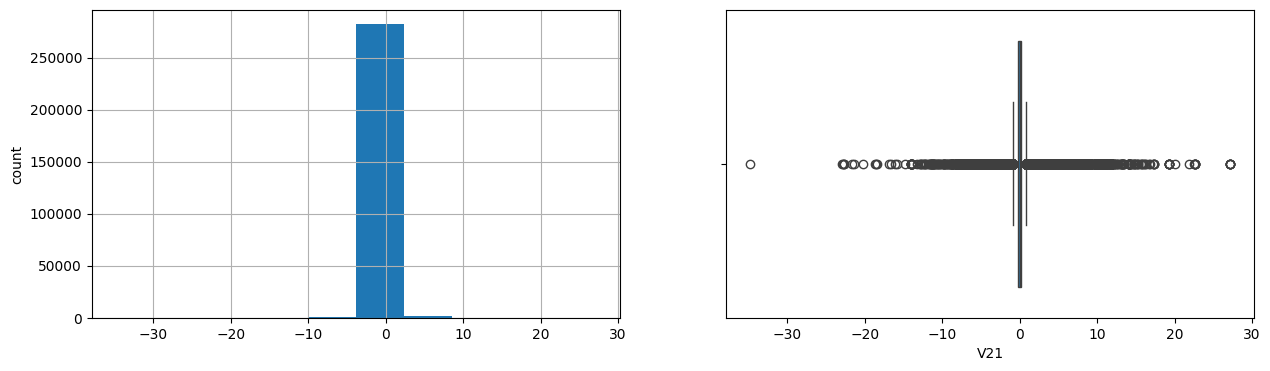

V22
Skew : -0.21


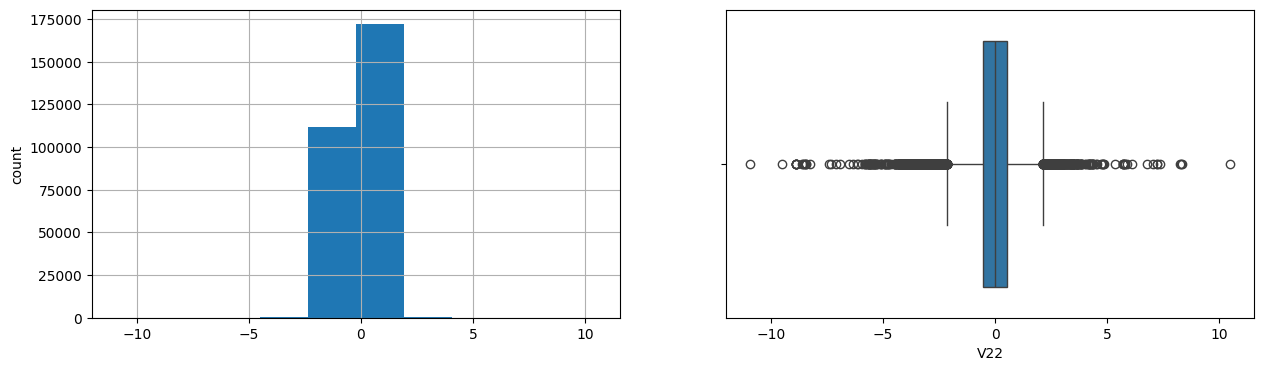

V23
Skew : -5.88


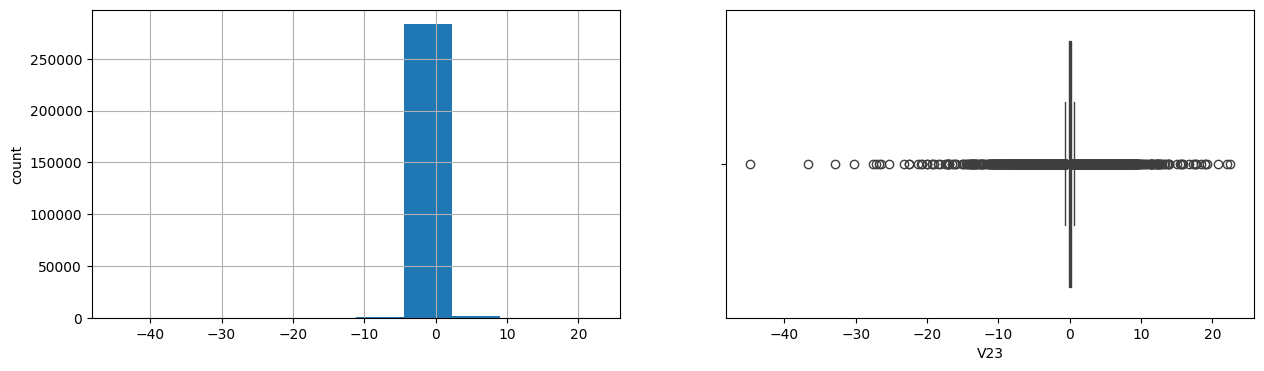

V24
Skew : -0.55


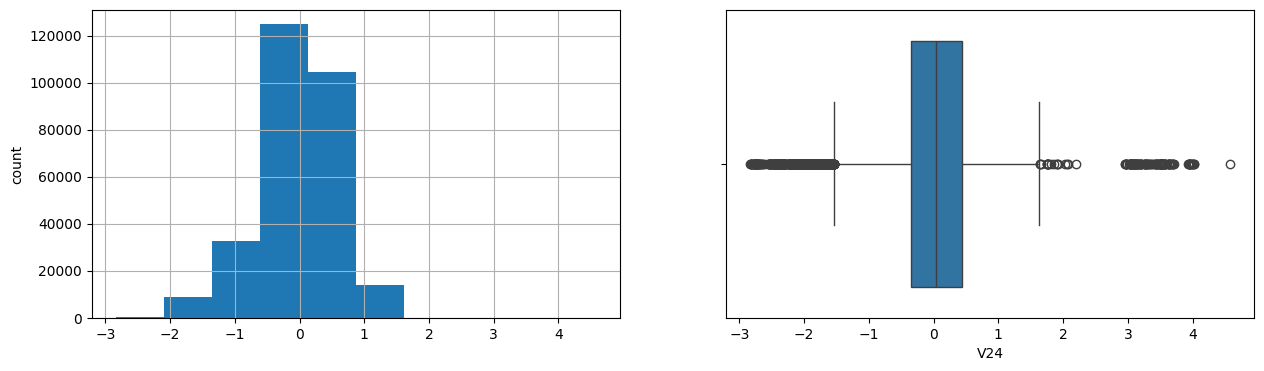

V25
Skew : -0.42


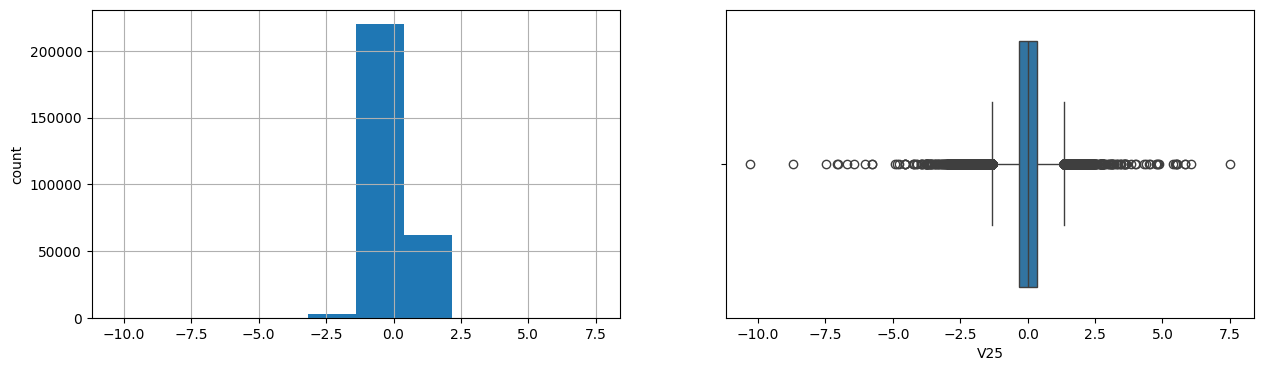

V26
Skew : 0.58


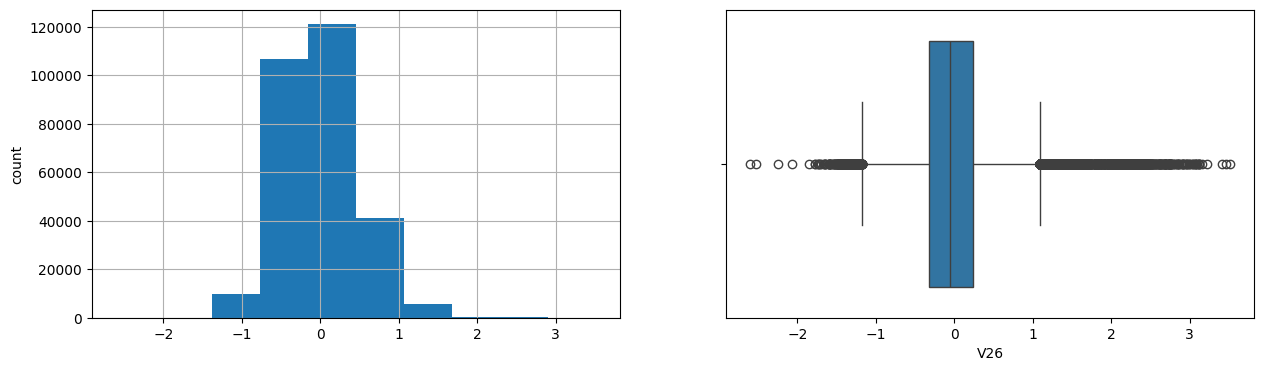

V27
Skew : -1.17


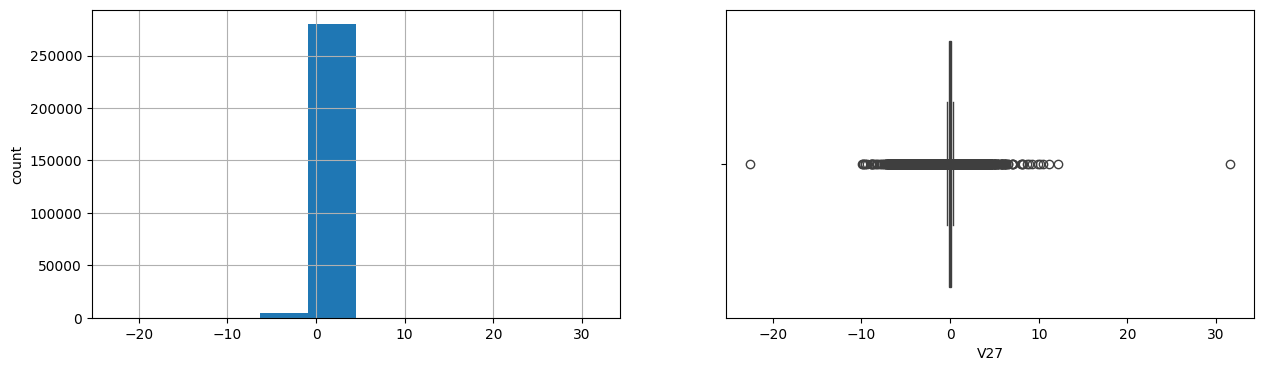

V28
Skew : 11.19


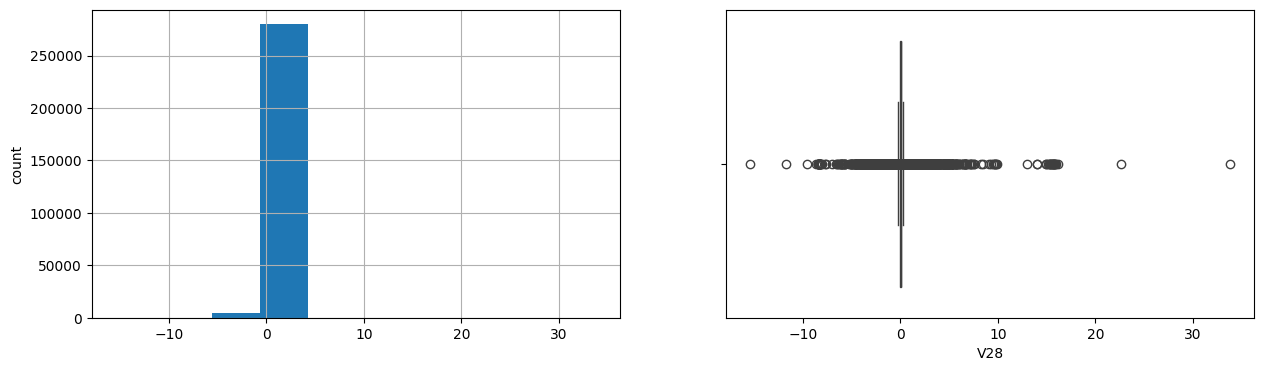

Amount
Skew : 16.98


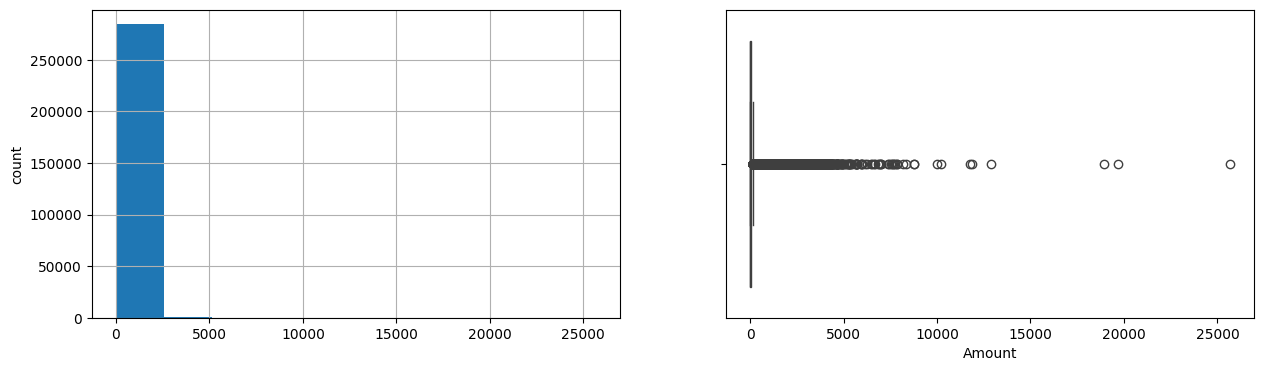

Class
Skew : 24.0


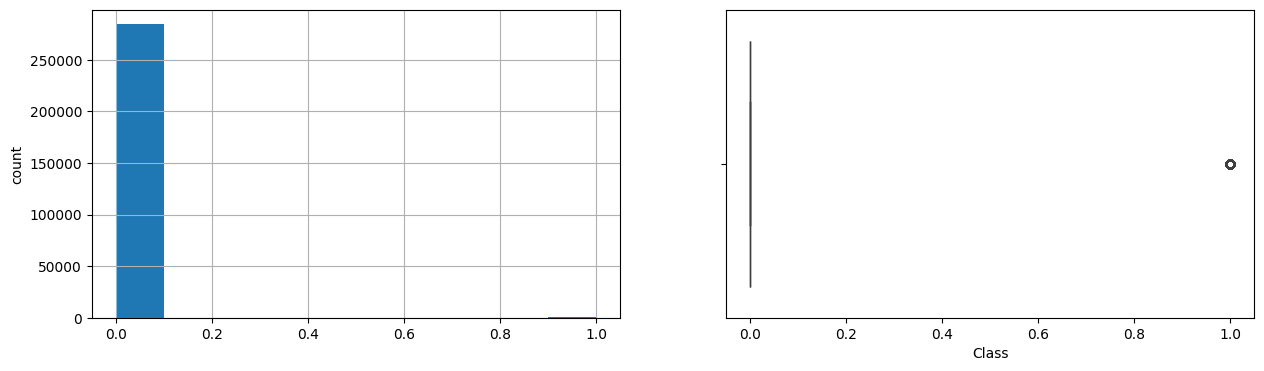

In [31]:
for col in col_names:
    print(col)
    print('Skew :', round(df[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    df[col].hist(grid=True)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.show()

## Student Question

1. Describe at least two major challenges in the dataset based on your EDA findings.
2. Analyze the correlation matrix of the features.
3. Is your data linearly separable? Please provide a rationale.

  **Student Answer:**  .......

1. Because there is no missing data, there were not many difficulties in the EDA analysis. However, checking the correlation of the features was a bit challenging.

2. To analyze the correlation matrix, we would typically compute the pairwise correlations between the features using correlation coefficient matrix. Given that the features V1 to V28 are PCA-transformed, most of them are expected to have low correlations with each other due to the nature of PCA, hich aims to reduce redundancy by projecting the data into orthogonal components.

3. Answer: No; because it is not balanced.

class 0:       **99.827251** %

class 1:       **0.172749** %

These are the results of calculating the percentage of each category in the 'Class' column. As we can see, almost 99.8% of the data is in category 0, and less than 0.18% belongs to category 1. The point is that we have over 284,800 data points, and based on these percentages, around 450 data points belong to category 1. Therefore, it is really hard to separate them linearly. This requires us to use oversampling techniques to increase the data in category 1.

## Data Preprocessing

Based on the challenges you've identified, recommend preprocessing methods to use during training to enhance model performance.

Some popular preprocessing techniques you can search about and learn include:

* Data Cleaning (Outlier Detection and Treatment, Handling Missing Values, ...)
* Data Transformation (Normalization, Standardization, ...)
* Feature Engineering (Feature Creation, Feature Selection, ...)
* Data Reduction (Dimensionality Reduction, Sampling, ...)
* Resampling Techniques (Oversampling or Undersampling)
* Handling Imbalanced Data
* ...


In [109]:
df_ = df.copy()
df_.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [110]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_.drop('Class', axis=1))
df_scaled = pd.DataFrame(df_scaled, columns= df_.drop('Class', axis=1).columns)
df_scaled['Class'] = df_['Class'].values
df_scaled

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996583,-0.694242,-0.044075,1.672773,0.973366,-0.245117,0.347068,0.193679,0.082637,0.331128,...,-0.024923,0.382854,-0.176911,0.110507,0.246585,-0.392170,0.330892,-0.063781,0.244964,0
1,-1.996583,0.608496,0.161176,0.109797,0.316523,0.043483,-0.061820,-0.063700,0.071253,-0.232494,...,-0.307377,-0.880077,0.162201,-0.561131,0.320694,0.261069,-0.022256,0.044608,-0.342475,0
2,-1.996562,-0.693500,-0.811578,1.169468,0.268231,-0.364572,1.351454,0.639776,0.207373,-1.378675,...,0.337632,1.063358,1.456320,-1.138092,-0.628537,-0.288447,-0.137137,-0.181021,1.160686,0
3,-1.996562,-0.493325,-0.112169,1.182516,-0.609727,-0.007469,0.936150,0.192071,0.316018,-1.262503,...,-0.147443,0.007267,-0.304777,-1.941027,1.241904,-0.460217,0.155396,0.186189,0.140534,0
4,-1.996541,-0.591330,0.531541,1.021412,0.284655,-0.295015,0.071999,0.479302,-0.226510,0.744326,...,-0.012839,1.100011,-0.220123,0.233250,-0.395202,1.041611,0.543620,0.651816,-0.073403,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,1.641931,-6.065842,6.099286,-6.486245,-1.459641,-3.886611,-1.956690,-3.975628,6.116573,1.742559,...,0.290602,0.154146,1.624574,-0.841000,2.756320,0.518500,2.337901,2.495529,-0.350151,0
284803,1.641952,-0.374121,-0.033356,1.342145,-0.521651,0.629040,0.794446,0.019667,0.246886,0.532299,...,0.291625,1.273781,0.019958,-1.677920,-1.163726,-0.819647,0.169641,-0.162164,-0.254117,0
284804,1.641974,0.980024,-0.182434,-2.143205,-0.393984,1.905833,2.275262,-0.239939,0.593140,0.393630,...,0.315913,0.796788,-0.060053,1.056944,0.509797,-0.181182,0.011037,-0.080467,-0.081839,0
284805,1.641974,-0.122755,0.321250,0.463320,0.487192,-0.273836,0.468155,-0.554672,0.568631,0.356887,...,0.361112,1.102451,-0.261503,0.203428,-1.091855,1.133635,0.269604,0.316687,-0.313249,0


In [111]:
df_scaled.Class.value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [112]:
for i in range(50):
    df_scaled = df_scaled.sample(frac= 1).reset_index(drop = True)
X = df_scaled.drop(columns='Class', axis=1)
y = df_scaled['Class']

In [113]:
from collections import Counter
print(f'Class distribution before oversampling: {Counter(y)}')
smote = SMOTE(sampling_strategy='auto', random_state=42)
x_oversampled, y_oversampled = smote.fit_resample(X, y)
print(f'Class distribution after oversampling: {Counter(y_oversampled)}')
df_oversampled = pd.DataFrame(x_oversampled, columns=X.columns)
df_oversampled['Class'] = y_oversampled
df_oversampled

Class distribution before overrsampling: Counter({0: 284315, 1: 492})
Class distribution after overrsampling: Counter({0: 284315, 1: 284315})


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.559443,-0.070041,0.216227,0.552532,-0.966232,-0.058449,-0.684450,0.306953,-0.226124,-1.335121,...,0.287626,0.649021,-0.461342,-0.147090,0.535114,-0.355884,-0.318795,0.038191,-0.331680,0
1,-0.327111,0.613967,-0.306933,0.561257,-0.536898,-0.839515,-0.293545,-0.608917,0.160365,1.863546,...,-0.002926,0.281781,0.019335,0.093359,0.721346,-1.351654,0.248284,0.086728,-0.349231,0
2,-0.216957,0.667165,-0.159521,0.391311,-0.659868,-0.488431,-0.238630,-0.395156,-0.054883,1.506116,...,-0.068489,0.251303,-0.252610,-0.666524,1.269690,-1.324951,0.253525,0.090422,-0.349231,0
3,-0.560180,0.170675,-1.142014,-0.016137,-0.367725,-0.938994,-0.094192,0.003600,0.114681,1.430736,...,0.433265,0.103588,-0.716980,0.037316,0.665142,-1.356423,-0.026710,0.258064,1.412206,0
4,0.547425,0.951325,-0.360598,-0.225633,0.217454,-0.138113,0.750216,-0.734254,0.332060,1.145999,...,0.326721,1.432987,0.390945,-1.750760,-0.950723,1.393707,0.086487,-0.180651,-0.325683,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,-1.580684,-7.245940,4.494583,-14.100356,8.418268,-5.768841,-1.652678,-12.501484,-0.301922,-5.815296,...,-3.223445,1.552324,1.563707,-1.704903,-0.599775,1.320321,5.383385,-4.219855,-0.349231,1
568626,1.278845,0.955280,0.818940,-1.379834,2.959775,0.922234,-0.583226,0.496238,-0.117979,-1.399581,...,-0.351574,-0.947149,0.256025,-0.425271,-0.062903,-0.357275,-0.030684,0.041823,-0.336174,1
568627,-0.842910,0.190138,0.746340,-1.296166,1.524487,-0.889448,-0.570915,-2.066453,0.533979,-1.071517,...,0.798511,0.452949,-0.450377,-0.700050,1.558631,-0.362519,1.475124,0.883130,-0.322729,1
568628,1.130303,0.231638,1.392303,-3.117875,2.878463,-0.007329,-0.653960,-1.109000,0.519007,-1.682340,...,0.372450,0.011505,0.350324,0.528973,-0.882970,-0.455696,0.543642,-0.483191,-0.143672,1


In [114]:
df_oversampled.Class.value_counts()

Class
0    284315
1    284315
Name: count, dtype: int64

In [157]:
df_oversampled_and_selecting_features = df_oversampled.copy()
from sklearn.ensemble import IsolationForest
iso_forest = IsolationForest(contamination=0.1, random_state=42)
outliers = iso_forest.fit_predict(df_oversampled_and_selecting_features)
df_oversampled_and_selecting_features["outliers"] = outliers
counts = df_oversampled_and_selecting_features.groupby(['Class', 'outliers']).size()
print(counts)

Class  outliers
0      -1            1765
        1          282550
1      -1           55096
        1          229219
dtype: int64


In [158]:
df_oversampled_and_selecting_features = df_oversampled_and_selecting_features[df_oversampled_and_selecting_features["outliers"] == 1].drop(columns=["outliers"])
df_oversampled_and_selecting_features['Class'].value_counts()

Class
0    282550
1    229219
Name: count, dtype: int64

In [159]:
df_oversampled_and_selecting_features

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.559443,-0.070041,0.216227,0.552532,-0.966232,-0.058449,-0.684450,0.306953,-0.226124,-1.335121,...,0.287626,0.649021,-0.461342,-0.147090,0.535114,-0.355884,-0.318795,0.038191,-0.331680,0
1,-0.327111,0.613967,-0.306933,0.561257,-0.536898,-0.839515,-0.293545,-0.608917,0.160365,1.863546,...,-0.002926,0.281781,0.019335,0.093359,0.721346,-1.351654,0.248284,0.086728,-0.349231,0
2,-0.216957,0.667165,-0.159521,0.391311,-0.659868,-0.488431,-0.238630,-0.395156,-0.054883,1.506116,...,-0.068489,0.251303,-0.252610,-0.666524,1.269690,-1.324951,0.253525,0.090422,-0.349231,0
3,-0.560180,0.170675,-1.142014,-0.016137,-0.367725,-0.938994,-0.094192,0.003600,0.114681,1.430736,...,0.433265,0.103588,-0.716980,0.037316,0.665142,-1.356423,-0.026710,0.258064,1.412206,0
4,0.547425,0.951325,-0.360598,-0.225633,0.217454,-0.138113,0.750216,-0.734254,0.332060,1.145999,...,0.326721,1.432987,0.390945,-1.750760,-0.950723,1.393707,0.086487,-0.180651,-0.325683,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568624,-1.444920,-9.524336,6.990213,-14.173637,4.290888,-10.408498,-3.204842,-12.203392,10.470645,-3.659321,...,2.371771,-1.809559,-1.205868,0.191187,2.395555,-0.471000,4.059162,1.484119,0.046539,1
568626,1.278845,0.955280,0.818940,-1.379834,2.959775,0.922234,-0.583226,0.496238,-0.117979,-1.399581,...,-0.351574,-0.947149,0.256025,-0.425271,-0.062903,-0.357275,-0.030684,0.041823,-0.336174,1
568627,-0.842910,0.190138,0.746340,-1.296166,1.524487,-0.889448,-0.570915,-2.066453,0.533979,-1.071517,...,0.798511,0.452949,-0.450377,-0.700050,1.558631,-0.362519,1.475124,0.883130,-0.322729,1
568628,1.130303,0.231638,1.392303,-3.117875,2.878463,-0.007329,-0.653960,-1.109000,0.519007,-1.682340,...,0.372450,0.011505,0.350324,0.528973,-0.882970,-0.455696,0.543642,-0.483191,-0.143672,1


In [160]:
df_oversampled_and_selecting_features["Class"].value_counts()

Class
0    282550
1    229219
Name: count, dtype: int64

In [161]:
for k, v in df_oversampled_and_selecting_features.items():
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    irq = q3 - q1
    v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
    perc = np.shape(v_col)[0] * 100.0 / np.shape(df)[0]
    print("Column %s outliers = %.2f%%" % (k, perc))

Column Time outliers = 0.00%
Column V1 outliers = 8.58%
Column V2 outliers = 7.92%
Column V3 outliers = 3.81%
Column V4 outliers = 0.49%
Column V5 outliers = 14.03%
Column V6 outliers = 11.85%
Column V7 outliers = 12.33%
Column V8 outliers = 20.18%
Column V9 outliers = 5.63%
Column V10 outliers = 4.33%
Column V11 outliers = 1.14%
Column V12 outliers = 4.86%
Column V13 outliers = 1.23%
Column V14 outliers = 1.37%
Column V15 outliers = 1.65%
Column V16 outliers = 9.95%
Column V17 outliers = 17.57%
Column V18 outliers = 16.73%
Column V19 outliers = 6.26%
Column V20 outliers = 14.97%
Column V21 outliers = 11.51%
Column V22 outliers = 1.48%
Column V23 outliers = 15.77%
Column V24 outliers = 2.77%
Column V25 outliers = 5.12%
Column V26 outliers = 1.68%
Column V27 outliers = 17.52%
Column V28 outliers = 15.78%
Column Amount outliers = 18.50%
Column Class outliers = 0.00%


## Training

1. Train your model on the preprocessed and unpreprocessed training data.
2. Report followning evaluaiton metrics: Accuracy, Accuracy, Recall, Precision, Confusion Matrix
3. Evaluation your best model using K-Fold Cross Validation
3. Crucial Step: Enhance Your Model's Performance

**Please note:** The results in our cell output represent the minimum achievable. Try to surpass these results and analyze multiple ideas and attempts.








## Logistic Regression

### Model with Raw Data

In [192]:
X_raw = df.drop("Class", axis=1)
y_raw = df["Class"]

In [210]:
x_train, x_temp, y_train, y_temp = train_test_split(X_raw, y_raw, test_size=0.4, random_state=42, shuffle=True)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size = 0.5, random_state=42, shuffle=True)

In [207]:
model = LogisticRegression(max_iter=10000)
model.fit(x_train, y_train)
y_val_pred = model.predict(x_val)
y_val_pred.shape, y_val_pred

((56961,), array([0, 0, 0, ..., 0, 0, 0], dtype=int64))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.85      0.58      0.69        98

    accuracy                           1.00     56961
   macro avg       0.93      0.79      0.85     56961
weighted avg       1.00      1.00      1.00     56961



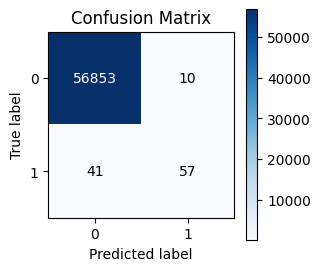

In [208]:
skplt.metrics.plot_confusion_matrix(y_val, y_val_pred, figsize=(3, 3))
print(classification_report(y_val, y_val_pred))

In [196]:
k_fold = KFold(n_splits=5)
cross_val_accuracy = cross_val_score (model, X_raw, y_raw, cv=k_fold, scoring='accuracy')
cross_val_precision = cross_val_score (model, X_raw, y_raw, cv=k_fold, scoring='precision')
cross_val_recall = cross_val_score (model, X_raw, y_raw, cv=k_fold, scoring='recall')

print(f'k_fold {k_fold}')
print(f'accuracy {cross_val_accuracy.mean()}')
print(f'precision {cross_val_precision.mean()}')
print(f'recall {cross_val_recall.mean()}')

k_fold KFold(n_splits=5, random_state=None, shuffle=False)
accuracy 0.996334389864435
precision 0.7411965869797195
recall 0.5775522808519988


### Model after preprocessing

In [183]:
X = df_oversampled_and_selecting_features.drop(columns='Class', axis=1)
y = df_oversampled_and_selecting_features['Class']

In [188]:
x_train, x_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size = 0.5, random_state = 42, shuffle=True)

In [189]:
model = LogisticRegression(max_iter=10000)
model.fit(x_train, y_train)
y_val_pred = model.predict(x_val)
y_val_pred.shape, y_val_pred

((51177,), array([0, 1, 0, ..., 1, 1, 0], dtype=int64))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     28135
           1       0.97      0.91      0.94     23042

    accuracy                           0.94     51177
   macro avg       0.95      0.94      0.94     51177
weighted avg       0.95      0.94      0.94     51177



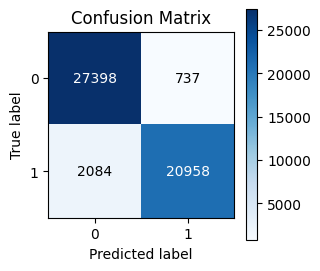

In [190]:
skplt.metrics.plot_confusion_matrix(y_val, y_val_pred, figsize=(3, 3))
print(classification_report(y_val, y_val_pred))

In [191]:
k_fold = KFold(n_splits=5)
cross_val_accuracy = cross_val_score(model, X, y, cv=k_fold, scoring='accuracy')
cross_val_precision = cross_val_score(model, X, y, cv=k_fold, scoring='precision')
cross_val_recall = cross_val_score(model, X, y, cv=k_fold, scoring='recall')

print(f'k_fold {k_fold}')
print(f'accuracy {cross_val_accuracy.mean()}')
print(f'precision {cross_val_precision.mean()}')
print(f'recall {cross_val_recall.mean()}')

k_fold KFold(n_splits=5, random_state=None, shuffle=False)
accuracy 0.9287099323613157
precision 0.5930178547350238
recall 0.9057965367820794


### SVM

* [SVM practical example](https://www.analyticsvidhya.com/blog/2021/10/support-vector-machinessvm-a-complete-guide-for-beginners/)

In [179]:
from sklearn import svm
svm_model = svm.SVC(kernel='rbf')
svm_model.fit(x_train, y_train)
y_val_pred_svm = svm_model.predict(x_val)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     28135
           1       0.99      0.99      0.99     23042

    accuracy                           0.99     51177
   macro avg       0.99      0.99      0.99     51177
weighted avg       0.99      0.99      0.99     51177



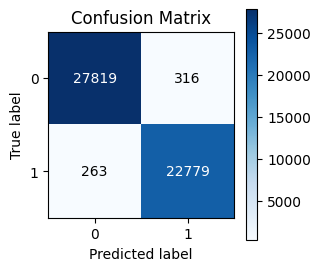

In [180]:
skplt.metrics.plot_confusion_matrix(y_val, y_val_pred_svm, figsize=(3, 3))
print(classification_report(y_val, y_val_pred_svm))

## Student Questions

1. Compare the SVM vs Logistic Regression model? Generally which one was better?
2. Is accuracy a suitable metric for evaluating performance in this problem? Explain your rationale.
3. If achieving high recall is crucial for our problem, what recommendations do you have to enhance this metric specifically for this dataset?

  **Student Answer:**  .......

1. Key Points for Comparison:
- Decision Boundary:
  - SVM (Support Vector Machine): SVM is a margin-based classifier that aims to find the optimal hyperplane that maximizes the margin between different classes. It can use different kernels (linear, polynomial, RBF, etc.) to create non-linear decision boundaries.
  - Logistic Regression: Logistic regression is a probabilistic model that estimates the probability that a given input belongs to a certain class. It assumes a linear relationship between the input features and the log-odds of the outcomes.

- Handling Non-linear Data:
  - SVM: With the use of kernel functions, SVM can handle non-linear relationships more effectively.
  - Logistic Regression: Logistic regression is limited to linear decision boundaries unless you manually add polynomial or interaction terms.

- Performance on Imbalanced Data:
  - SVM: SVM can struggle with highly imbalanced data unless you adjust the class weights or apply techniques like SMOTE.
  - Logistic Regression: Logistic regression can also struggle with imbalanced data, but class weighting and threshold tuning can help improve its performance on the minority class.


- Interpretability:
  - SVM: SVMs are less interpretable, especially with non-linear kernels.
  - Logistic Regression: Logistic regression is more interpretable as it provides coefficients that indicate the direction and magnitude of each feature's contribution to the prediction.

- Computational Complexity:
  - SVM: SVMs, especially with non-linear kernels, can be computationally expensive on large datasets.
  - Logistic Regression: Logistic regression is generally faster and more scalable to large datasets.

The choice depends on the specific dataset and the problem at hand. Generally:
Logistic Regression is often preferred when interpretability, simplicity, and scalability are important.
SVM might be better for capturing complex patterns in the data, especially when the data is not linearly separable and when computational resources are not a limiting factor.


2. In many problems like fraud detection, the dataset is highly imbalanced, with a small percentage of positive (fraudulent) cases compared to negative (non-fraudulent) cases. However, in imbalanced datasets, accuracy can be misleading. For example, if 99% of transactions are legitimate, a model that predicts all transactions as legitimate will have 99% accuracy but will fail completely at detecting fraud. So, Accuracy is not a suitable metric for this problem due to the class imbalance. Instead, metrics like recall, precision, F1-score, and AUC-ROC should be considered for evaluating performance.
3. If high recall is crucial, focus on adjusting the decision threshold, applying class weights, using resampling techniques, and considering ensemble methods or cost-sensitive learning. These approaches will help in increasing the recall, ensuring that more actual fraud cases are detected.

# Unsupervised Image Segmentation using Clustering!

Image segmentation is a crucial step in image processing and is essential for analyzing image contents. For instance, to determine if an indoor image contains a chair or a person, image segmentation can be used to isolate and examine each object individually. It typically precedes tasks like pattern recognition, feature extraction, and image compression.

Image segmentation involves classifying an image into various groups. Extensive research has been conducted in this field, particularly using clustering techniques. Among these, the K-Means clustering algorithm is one of the most widely used methods.

The process of image segmentation transforms an image into a set of pixel regions, represented by a mask or a labeled image. This segmentation allows for the targeted processing of significant image segments rather than the entire image.

In this section we want to demonstrate K-Mean able to cluster similar pixel properly. and finaly segment components of an image!

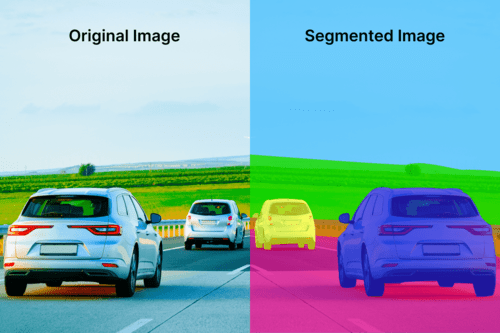

## Load Data

In [47]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Image Link (You can download and upload it): https://drive.google.com/file/d/16iMaYEGH-GgmqZfrCTw2vjYayllcgFcb/view?usp=sharing
!gdown 16iMaYEGH-GgmqZfrCTw2vjYayllcgFcb

Downloading...
From: https://drive.google.com/uc?id=16iMaYEGH-GgmqZfrCTw2vjYayllcgFcb
To: /content/elephant.jpg

  0% 0.00/36.2k [00:00<?, ?B/s]
100% 36.2k/36.2k [00:00<00:00, 66.7MB/s]


In [48]:
im = cv2.imread('./elephant.jpg') # Reads an image into BGR Format
im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
original_shape = im.shape
print(original_shape)

(330, 500, 3)


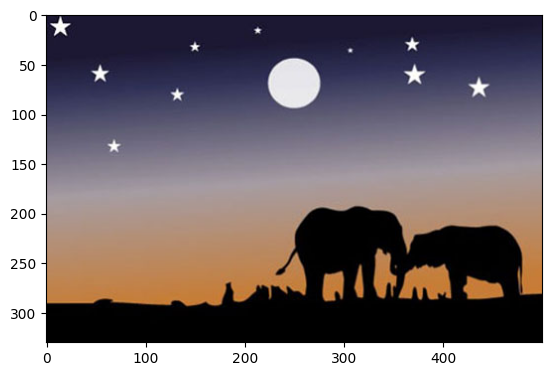

In [49]:
plt.imshow(im) # as RGB Format
plt.show()

In [51]:
# Flatten Each channel of the Image
all_pixels  = im.reshape((-1,3))
print(all_pixels.shape)

(165000, 3)


In [52]:
all_pixels

array([[23, 19, 46],
       [25, 21, 48],
       [28, 24, 51],
       ...,
       [ 0,  0,  0],
       [ 0,  0,  0],
       [ 0,  0,  0]], dtype=uint8)

## Number of Dominant Colors in Image

The optimal number of clusters when clustering all pixels represents the predominant colors in an image.








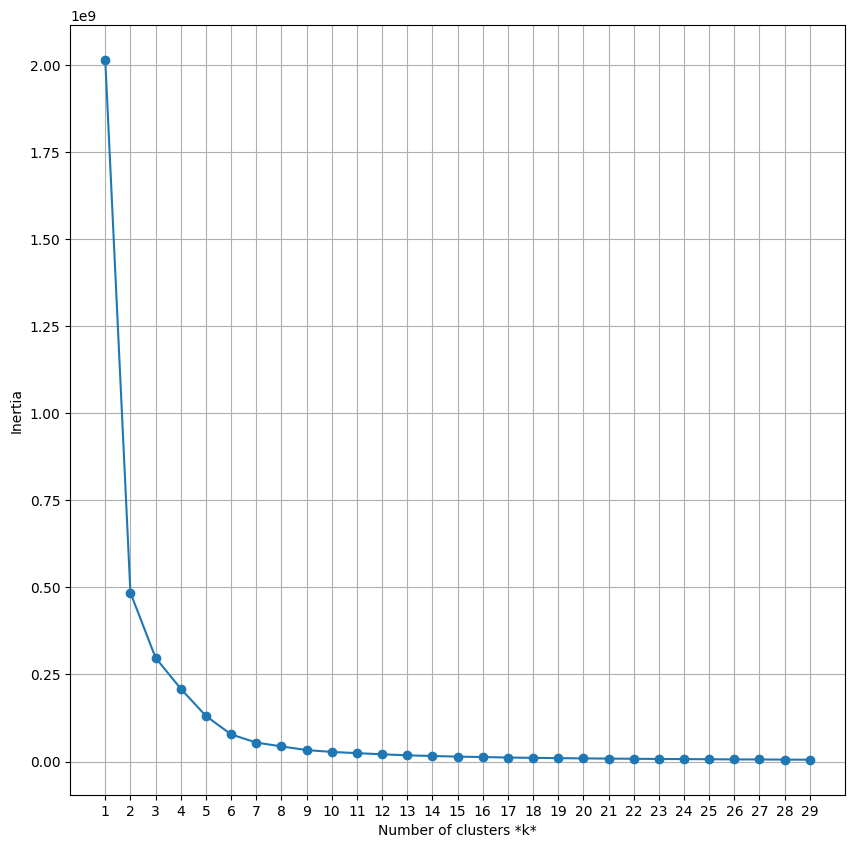

In [20]:
# Elbow Method or # Silhouette Score
# The optimal number of clusters when clustering all pixels represents the predominant colors in an image.

inertias = []
list_k = list(range(1, 30))

for k in list_k:
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(all_pixels)
    inertias.append(kmeans.inertia_)
    

plt.figure(figsize=(10, 10))
plt.plot(list_k, inertias, marker='o')
plt.xticks(list_k)
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

## Visualize Dominant Color

In [53]:
# Now that you have the number of dominant colors (clusters),
# use clustering to determine the cluster of each pixel.
optimal_clusters = 6

kmeans = KMeans(n_clusters=optimal_clusters, n_init=10)
kmeans.fit(all_pixels)

dominant_colors = kmeans.cluster_centers_

labels = kmeans.labels_

In [54]:
dominant_colors

array([[159.77832833, 143.94251751, 144.69862982],
       [ 36.81478988,  33.97823038,  63.02513606],
       [ 92.31413555,  89.49312019, 114.3607066 ],
       [  1.47824324,   0.82693088,   1.14876296],
       [189.04479875, 132.36275501,  83.12635545],
       [232.70848846, 232.40022338, 236.70439315]])

In [58]:
labels

array([1, 1, 1, ..., 3, 3, 3])

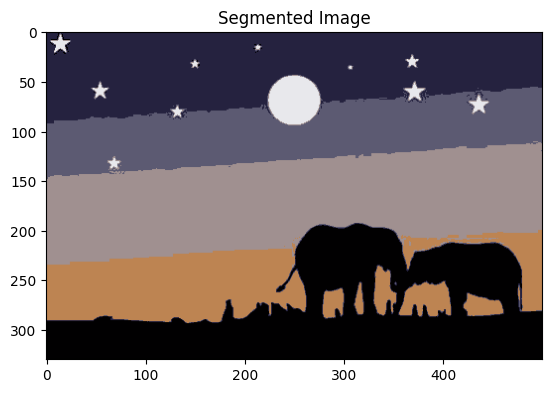

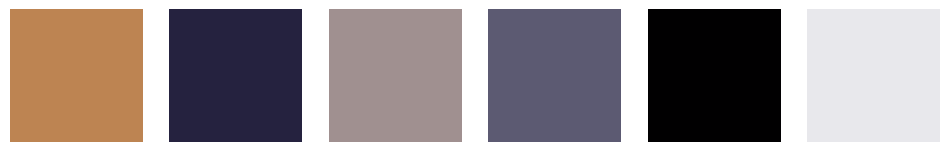

In [27]:
segmented_image = dominant_colors[labels].reshape(original_shape).astype('uint8')

plt.imshow(segmented_image)
plt.title('Segmented Image')
plt.show()

plt.figure(figsize=(12, 8))
for i, color in enumerate(dominant_colors):
    plt.subplot(1, optimal_clusters, i + 1)
    plt.imshow([[color / 255]])
    plt.axis('off')
plt.show()


## Segmenting original image

In [16]:
new_img = np.zeros((330*500,3),dtype='uint8')
print(new_img.shape)

(165000, 3)


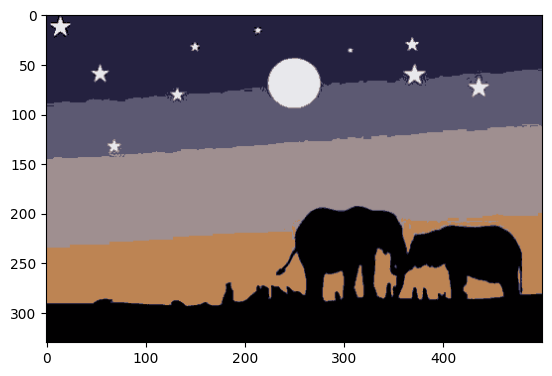

In [17]:
colors = kmeans.cluster_centers_
lables = kmeans.labels_

# Iterate over the image
for ix in range(new_img.shape[0]):
    new_img[ix] = colors[lables[ix]]

new_img = new_img.reshape((original_shape))
plt.imshow(new_img)
plt.show()